In [742]:
import numpy as np
import matplotlib.pyplot as plt

In [743]:
R = 2
angle = np.linspace(0.0, 2.0 * np.pi, 256)

In [744]:
x = R * np.cos(angle)
y = R * np.sin(angle)

n_theta = 5
dtheta = np.pi / n_theta
theta = np.arange(-np.pi/2, np.pi/2, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5
theta_alt = np.arange(-np.pi/2 + dtheta, np.pi/2 + dtheta, dtheta)

In [745]:
def vec_angle(vec):
    x = vec[0]
    y = vec[1]
    if x > 0:
        return np.arctan(y / x)
    if x < 0 and y >= 0:
        return np.arctan(y / x) + np.pi
    if x < 0 and y < 0:
        return np.arctan(y / x) - np.pi
    if x == 0 and y > 0:
        return np.pi/2
    if x == 0 and y < 0:
        return -np.pi/2        

k3 A: 	1.1071487177940904
k1 A: 	0.5404195002705842
k2: 	2.394580435827234
mid: 2.394580435827234
match: 	True
mid mod: 	-0.7470122177625598
mod match: 	True



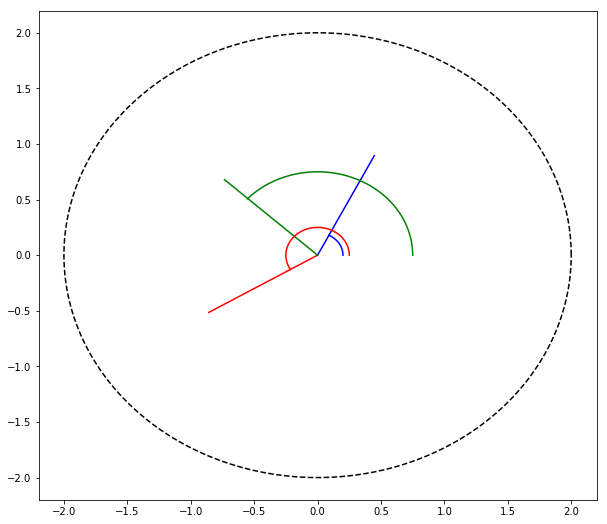

In [679]:
# %matplotlib widget

plt.figure(figsize = (10, 9))
plt.plot(x, y, 'k--')
# for t, t2, t3 in zip(theta, mid_theta, theta_alt):
#     plt.plot([0, R * np.cos(t)], [0, R * np.sin(t)], 'r--')
#     plt.plot([0, R * np.cos(t2)], [0, R * np.sin(t2)], 'b--')
#     plt.plot([0, R * np.cos(t3)], [0, R * np.sin(t3)], 'c')
k3 = np.array([32, 64])
k3 = k3/np.linalg.norm(k3)
k1 = np.array([40, 24])
k1 = k1/np.linalg.norm(k1)
k2 = k3 - k1
k2 =  k2 / np.linalg.norm(k2)
plt.plot([0, k3[0]], [0, k3[1]], 'b')
plt.plot([0, -k1[0]], [0, -k1[1]], 'r')
plt.plot([0, k2[0]], [0, k2[1]], 'g')
print("k3 A: \t{}\nk1 A: \t{}\nk2: \t{}\nmid: {}\nmatch: \t{}\nmid mod: \t{}\nmod match: \t{}".format(vec_angle(k3), 
                                                                                                      vec_angle(k1), 
                                                                                                      vec_angle(k2), 
                                                                                                      (vec_angle(k3) + vec_angle(k1) + np.pi)/2, 
                                                                                                      np.isclose(vec_angle(k2), (vec_angle(k3) + vec_angle(k1) + np.pi)/2), 
                                                                                                      np.mod((vec_angle(k3) + vec_angle(k1) + np.pi)/2+ 2.0 * np.pi, 2.0 * np.pi) - np.pi, 
                                                                                                      np.isclose(vec_angle(k2), np.mod((vec_angle(k3) + vec_angle(k1) + np.pi)/2 + 2.0 * np.pi, 2.0 * np.pi))))

print()

k3a = np.arange(0.0, vec_angle(k3) + 0.01, 0.01)
k1a = np.arange(0.0, vec_angle(k1) + np.pi + 0.01, 0.01)
k2a = np.arange(0.0, vec_angle(k2) + 0.01, 0.01)
plt.plot(0.2 * np.cos(k3a), 0.2 * np.sin(k3a), 'b')
plt.plot(0.25 * np.cos(k1a), 0.25 * np.sin(k1a), 'r')
plt.plot(0.75 * np.cos(k2a), 0.75 * np.sin(k2a), 'g')


plt.show()

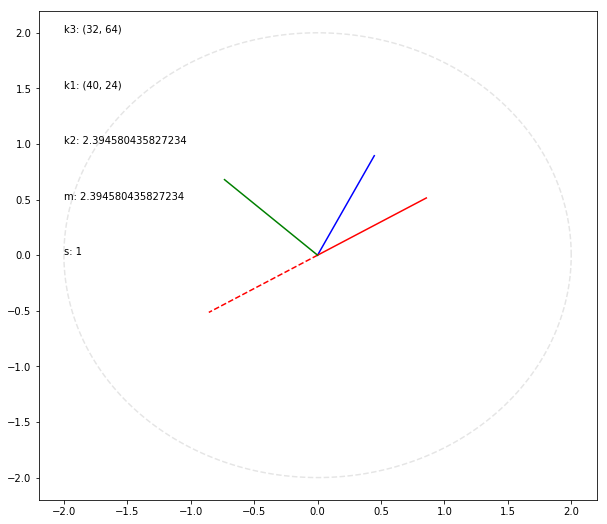

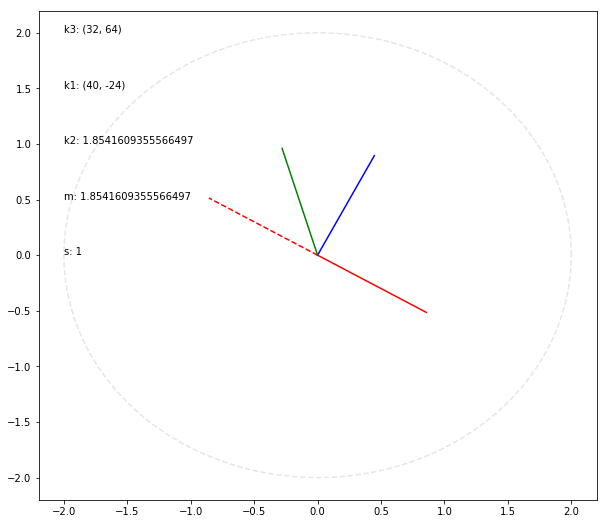

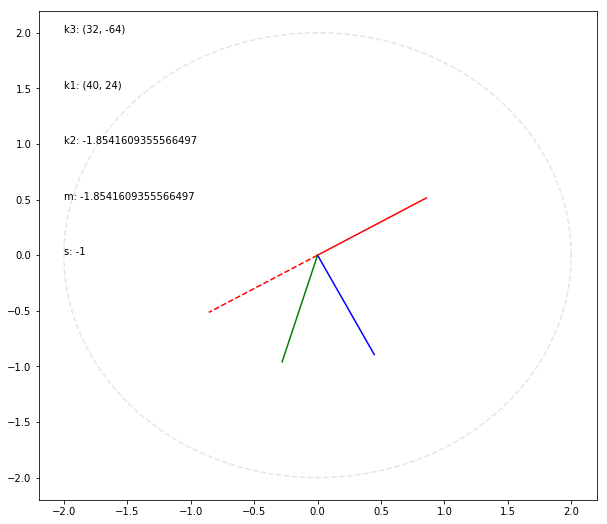

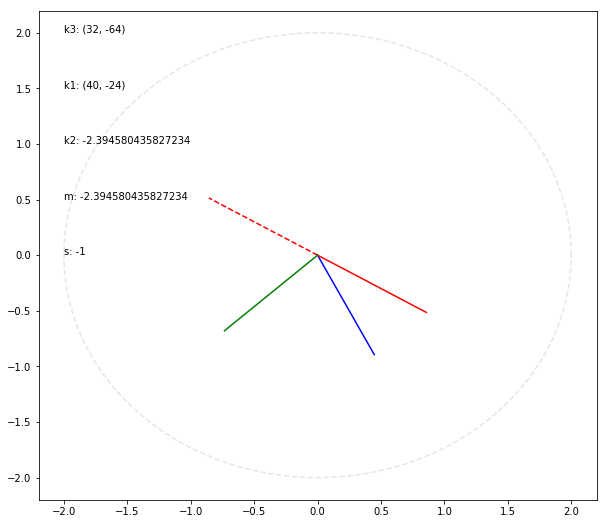

In [680]:
k3x_l = [32]
k3y_l = [64, -64]
k1x_l = [40]
k1y_l = [24, -24]

for k3x in k3x_l:
    for k3y in k3y_l:
        k3 = np.array([k3x, k3y])
        k3 = k3/np.linalg.norm(k3)
        for k1x in k1x_l:
            for k1y in k1y_l:
                k1 = np.array([k1x, k1y])
                k1 = k1/np.linalg.norm(k1)
                k2 = k3 - k1
                k2x = k2[0]
                k2y = k2[1]
                pre_fac = k1x*k3y - k3x*k1y
                k2 =  k2 / np.linalg.norm(k2)
                plt.figure(figsize = (10, 9))
                plt.plot(x, y, 'k--', alpha = 0.1)
                plt.plot([0, k3[0]], [0, k3[1]], 'b')
                plt.plot([0, k1[0]], [0, k1[1]], 'r')
                plt.plot([0, -k1[0]], [0, -k1[1]], 'r--')
                plt.plot([0, k2[0]], [0, k2[1]], 'g')
                plt.text(x = -2, y = 2, s =  "k3: ({}, {})".format(k3x, k3y))
                plt.text(x = -2, y = 1.5, s =  "k1: ({}, {})".format(k1x, k1y))
                plt.text(x = -2, y = 1, s =  "k2: {}".format(vec_angle(k2)))
                plt.text(x = -2, y = 0.5, s = "m: {}".format((vec_angle(k3) + vec_angle(k1) + np.sign(k1x*k2y - k2x*k1y)*np.pi)/2))
                plt.text(x = -2, y = 0.0, s = "s: {}".format(np.sign(pre_fac)))
                
                plt.show()

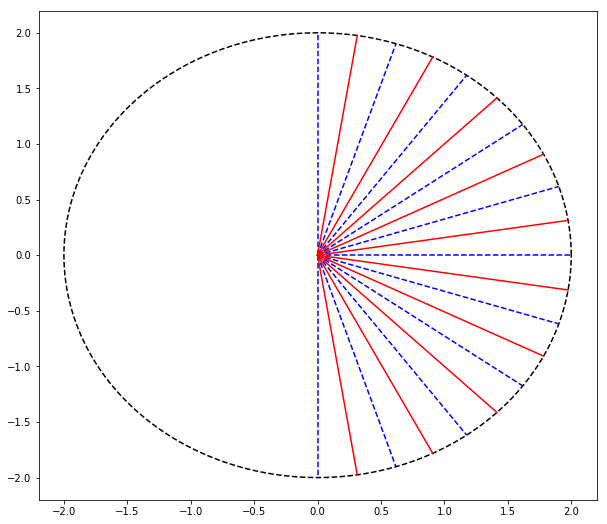

In [681]:
n_theta   = 10
dtheta    = np.pi / n_theta
theta     = np.arange(-np.pi/2, np.pi/2 + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5

plt.figure(figsize = (10, 9))
plt.plot(x, y, 'k--')
for a in range(theta.shape[0]):
    plt.plot([0, R*np.cos(theta[a])], [0, R*np.sin(theta[a])], 'b--')
for a in range(mid_theta.shape[0]):
    plt.plot([0, R*np.cos(mid_theta[a])], [0, R*np.sin(mid_theta[a])], 'r')

ml: -1.5707963267948966	k2a: -0.962933938534893	k2a: 2.1786587150549	mr: -0.9424777960769379	k: True	-k: False

ml: -0.9424777960769379	k2a: -0.42251443826430896	k2a: 2.719078215325484	mr: -0.3141592653589793	k: True	-k: False

ml: 0.3141592653589793	k2a: 0.42251443826430896	k2a: -2.719078215325484	mr: 0.9424777960769379	k: True	-k: False

ml: 0.3141592653589793	k2a: -2.5337302653297895	k2a: 0.6078623882600038	mr: 0.9424777960769379	k: False	-k: True

ml: 0.9424777960769379	k2a: 0.962933938534893	k2a: -2.1786587150549	mr: 1.5707963267948966	k: True	-k: False

ml: 0.9424777960769379	k2a: -1.9933107650592052	k2a: 1.1482818885305879	mr: 1.5707963267948966	k: False	-k: True

ml: -1.5707963267948966	k2a: -0.962933938534893	k2a: 2.1786587150549	mr: -0.9424777960769379	k: True	-k: False



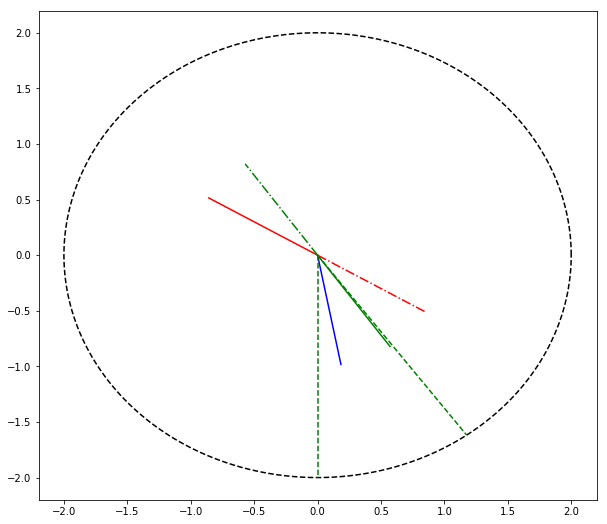

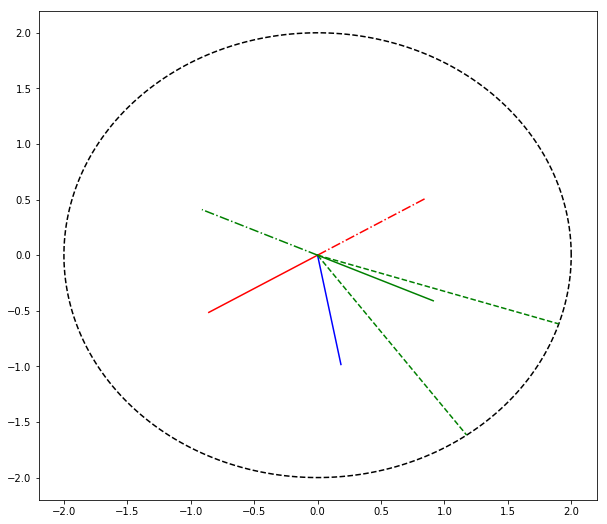

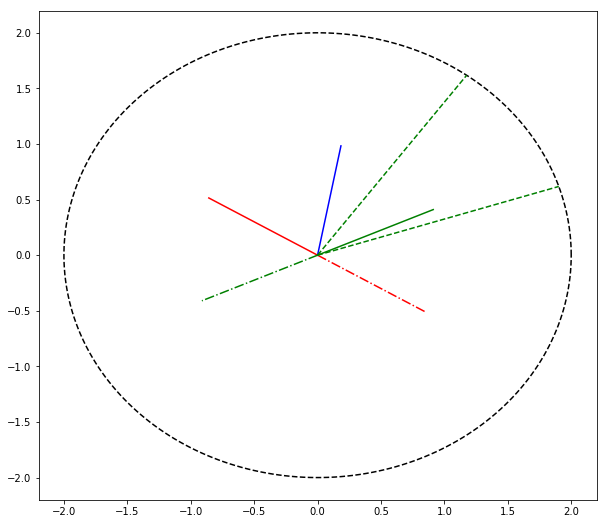

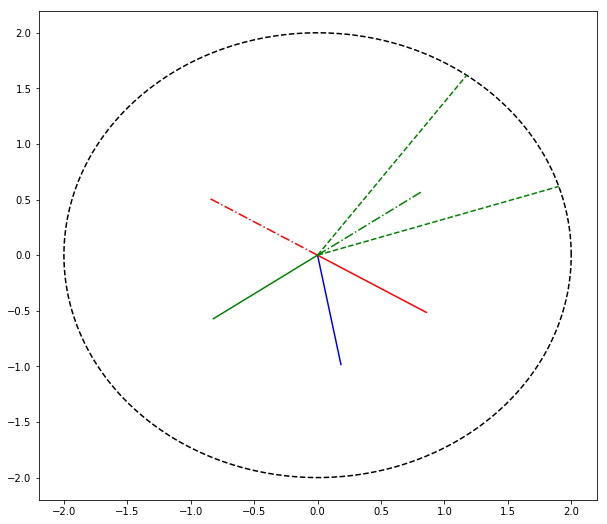

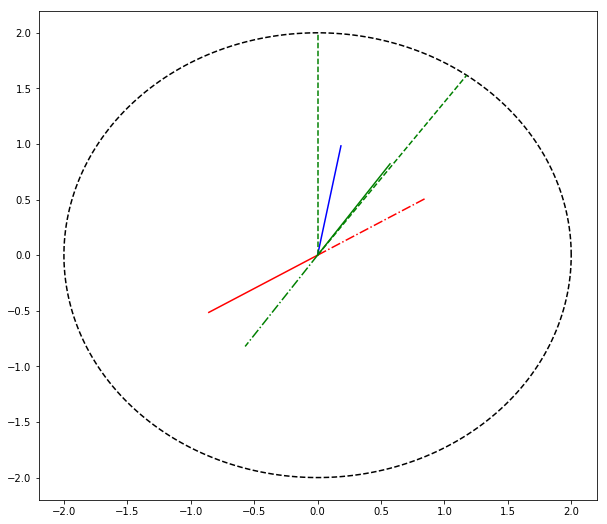

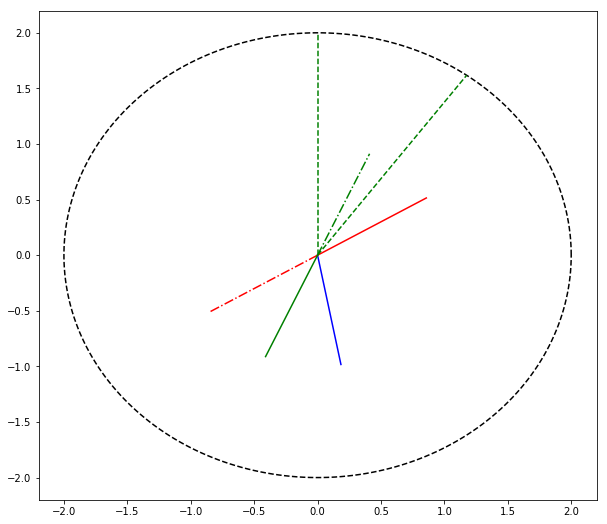

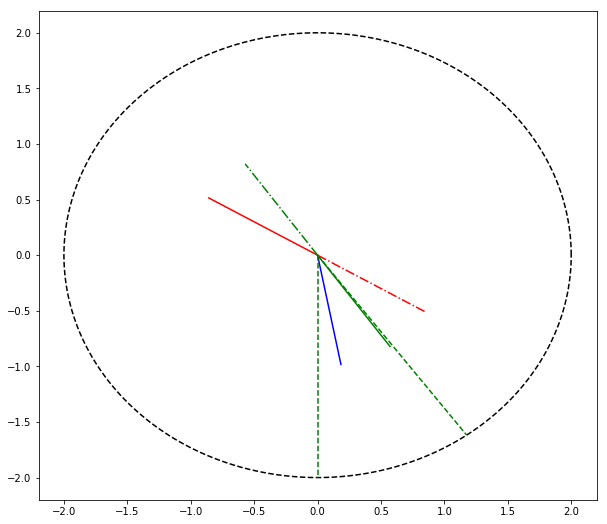

In [682]:
k3x_l = [12]
k3y_l = [64, -64]
k1x_l = [40, -40]
k1y_l = [24, -24]

n_theta   = 5
dtheta    = np.pi / n_theta
theta     = np.arange(-np.pi/2, np.pi/2 + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5

for a in range(theta.shape[0]):
    l = 4
#     for l in range(mid_theta.shape[0]):   
    for k3x in k3x_l:
        for k3y in k3y_l:
            k3 = np.array([k3x, k3y])
            k3 = k3/np.linalg.norm(k3)
            for k1x in k1x_l:
                for k1y in k1y_l:
                    k1 = np.array([k1x, k1y])
                    k1 = k1/np.linalg.norm(k1)
                    k2 = k3 - k1
                    k2x = k2[0]
                    k2y = k2[1]
                    pre_fac = k1x*k2y - k2x*k1y
                    k2 =  k2 / np.linalg.norm(k2)
                    if (mid_theta[np.mod(a, n_theta)] - dtheta/2 <= vec_angle(k2) < mid_theta[np.mod(a, n_theta)] + dtheta/2) or (k2y < 0 and (mid_theta[np.mod(a, n_theta)] - dtheta/2 <= vec_angle(-k2) < mid_theta[np.mod(a, n_theta)] + dtheta/2)):
                        print("ml: {}\tk2a: {}\tk2a: {}\tmr: {}\tk: {}\t-k: {}\n".format(mid_theta[np.mod(a, n_theta)] - dtheta/2, vec_angle(k2), vec_angle(-k2), mid_theta[np.mod(a, n_theta)] + dtheta/2,
                                                                                        (mid_theta[np.mod(a, n_theta)] - dtheta/2 <= vec_angle(k2) < mid_theta[np.mod(a, n_theta)] + dtheta/2),
                                                                                        (mid_theta[np.mod(a, n_theta)] - dtheta/2 <= vec_angle(-k2) < mid_theta[np.mod(a, n_theta)] + dtheta/2)))
                        plt.figure(figsize = (10, 9))
                        plt.plot(x, y, 'k--')
                        plt.plot([0, k3[0]], [0, k3[1]], 'b')
                        plt.plot([0, k1[0]], [0, k1[1]], 'r')
                        plt.plot([0, -k1[0]], [0, -k1[1]], 'r-.')
                        plt.plot([0, k2[0]], [0, k2[1]], 'g')
                        plt.plot([0, -k2[0]], [0, -k2[1]], 'g-.')
                        plt.plot([0, R*np.cos(mid_theta[np.mod(a, n_theta)] - dtheta/2)], [0, R*np.sin(mid_theta[np.mod(a, n_theta)] - dtheta/2)], 'g--')
                        plt.plot([0, R*np.cos(mid_theta[np.mod(a, n_theta)] + dtheta/2)], [0, R*np.sin(mid_theta[np.mod(a, n_theta)] + dtheta/2)], 'g--')
                        
#                         plt.plot([0, R*np.cos(mid_theta[np.mod(a + l, n_theta)] - dtheta/2)], [0, R*np.sin(mid_theta[np.mod(a + l, n_theta)] - dtheta/2)], 'b--')
#                         plt.plot([0, R*np.cos(mid_theta[np.mod(a + l, n_theta)] + dtheta/2)], [0, R*np.sin(mid_theta[np.mod(a + l, n_theta)] + dtheta/2)], 'b--')
#                     if vec_angle(k2) >= mid_theta[np.mod(a + l, n_theta)] - dtheta/2 and vec_angle(k2) < mid_theta[np.mod(a + l, n_theta)] + dtheta/2:
#                         plt.figure(figsize = (10, 9))
#                         plt.plot(x, y, 'k--')
#                         plt.plot([0, R*np.cos(theta[a])], [0, R*np.sin(theta[a])], 'b--')
#                         plt.plot([0, R*np.cos(theta[a + 1])], [0, R*np.sin(theta[a + 1])], 'b--')
#                         plt.plot([0, R*np.cos(mid_theta[np.mod(a + l, n_theta)] - dtheta/2)], [0, R*np.sin(mid_theta[np.mod(a + l, n_theta)] - dtheta/2)], 'r--')
#                         plt.plot([0, R*np.cos(mid_theta[np.mod(a + l, n_theta)] + dtheta/2)], [0, R*np.sin(mid_theta[np.mod(a + l, n_theta)] + dtheta/2)], 'r--')

#                         plt.plot([0, k3[0]], [0, k3[1]], 'b')
#                         plt.plot([0, k1[0]], [0, k1[1]], 'r')
#                         plt.plot([0, -k1[0]], [0, -k1[1]], 'r--')
#                         plt.plot([0, k2[0]], [0, k2[1]], 'g')
#                         plt.text(x = -2, y = 2, s =  "k3: ({}, {})".format(k3x, k3y))
#                         plt.text(x = -2, y = 1.5, s =  "k1: ({}, {})".format(k1x, k1y))
#                         plt.text(x = -2, y = 1, s =  "k2: {}".format(vec_angle(k2)))
#                         plt.text(x = -2, y = 0.5, s = "m: {}".format((vec_angle(k3) + vec_angle(k1) + np.sign(k1x*k2y - k2x*k1y)*np.pi)/2))
#                         plt.text(x = -2, y = 0.0, s = "s: {}".format(np.sign(pre_fac)))

#                         plt.show()           

In [683]:
def plot_triad_wave_vec(k3_vec, k1_vec):
    k3x = k3_vec[0]
    k3y = k3_vec[1]
    k1x = k1_vec[0]
    k1y = k1_vec[1]
    k3 = np.array(k3_vec)
    k3 = k3/np.linalg.norm(k3)
    k1 = np.array(k1_vec)
    k1 = k1/np.linalg.norm(k1)
    k2 = k3 - k1
    k2x = k2[0]
    k2y = k2[1]
    k1_curl_k3 = k1x*k3y - k3x*k1y
    k2 =  k2 / np.linalg.norm(k2)
    
    plt.figure(figsize = (10, 9))
    plt.plot(x, y, 'k--', alpha = 0.2)
    plt.plot([0, 0], [-R, R], 'k--', alpha = 0.2)
    plt.plot([R, -R], [0, 0], 'k--', alpha = 0.2)
    plt.plot([0, k3[0]], [0, k3[1]], 'b')
    plt.plot([0, k1[0]], [0, k1[1]], 'r')
    plt.plot([0, -k1[0]], [0, -k1[1]], 'r-.')
    plt.plot([0, k2[0]], [0, k2[1]], 'g')

    plt.text(x = -2, y = 2, s = "k3: ({}, {})".format(k3x, k3y))
    plt.text(x = -2, y = 1.75, s = "k2: ({}, {})".format(k2x, k2y))
    plt.text(x = -2, y = 1.5, s = "k1: ({}, {})".format(k1x, k1y))
    plt.text(x = -2, y = 1, s = "k2: {}".format(vec_angle(k2)))
    plt.text(x = -2, y = 0.5, s = "m: {}, {}".format(np.real(1 / np.complex(0.0, 2.0)*(np.log(np.complex(-k1[0], -k1[1]) + np.complex(k3[0], k3[1])) - np.log(np.complex(-k1[0], k1[1]) + np.complex(k3[0], -k3[1])))), (vec_angle(k3) + vec_angle(k1) + np.sign(k1_curl_k3) * np.pi)/2))
    plt.text(x = -2, y = 0.0, s = "s: {}, {}".format(np.sign(pre_fac), np.sign(np.cross(k2, k3))))


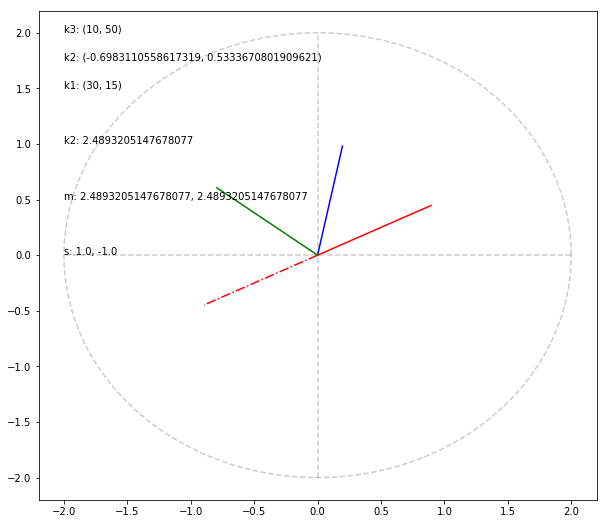

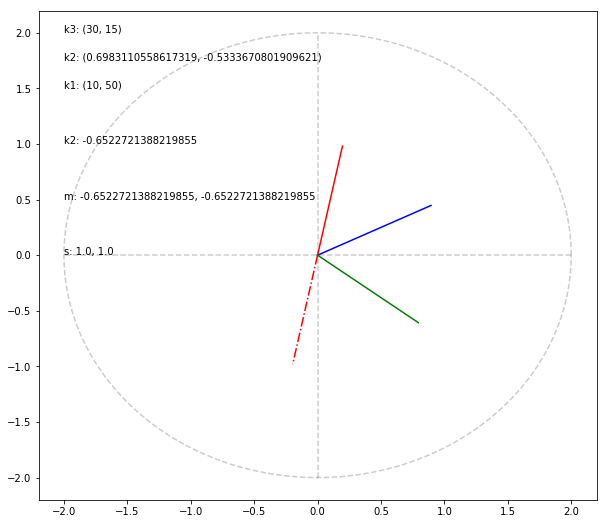

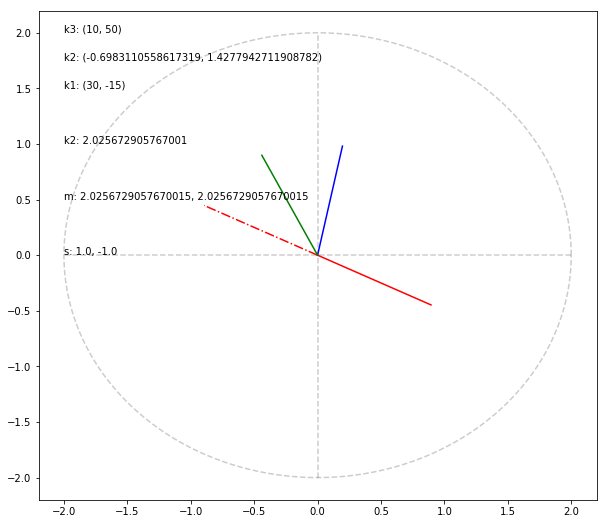

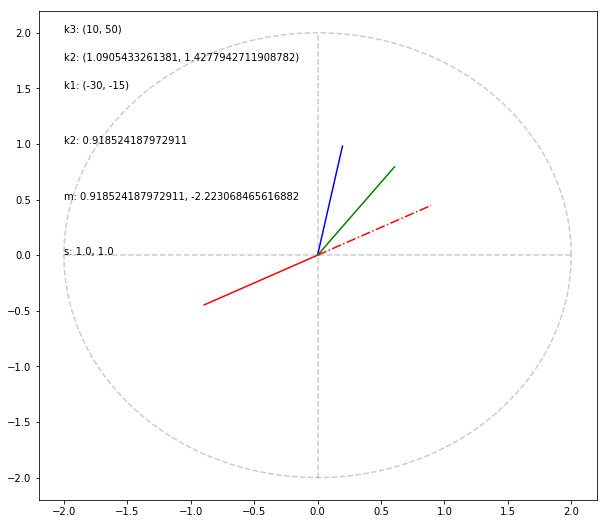

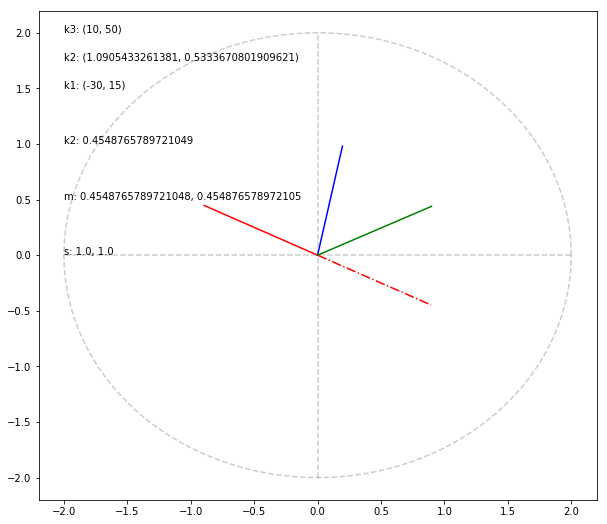

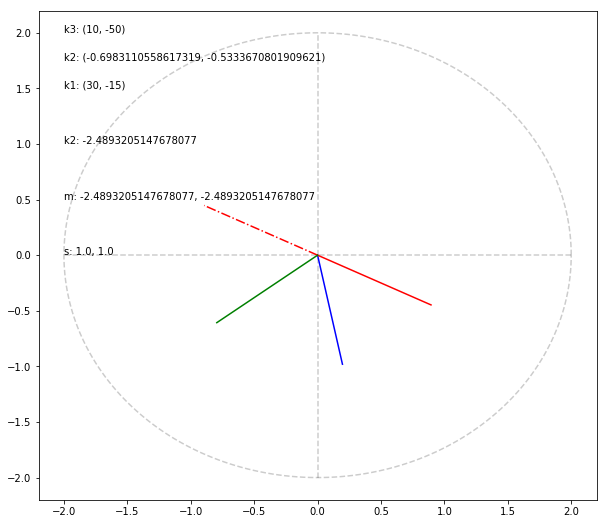

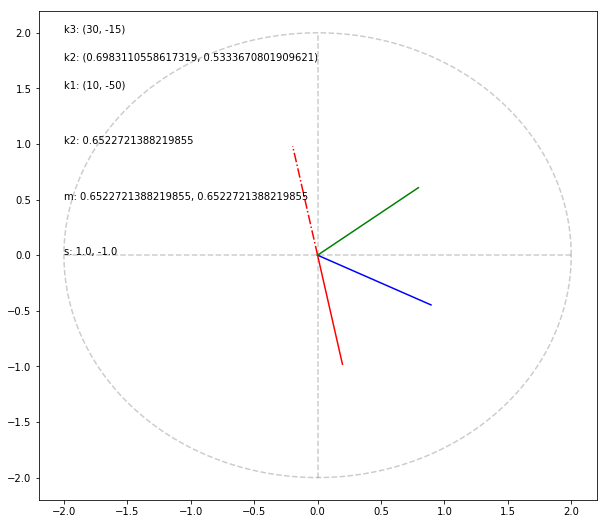

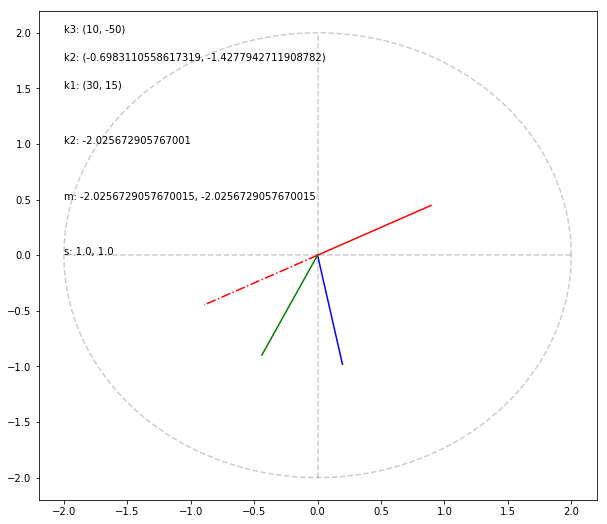

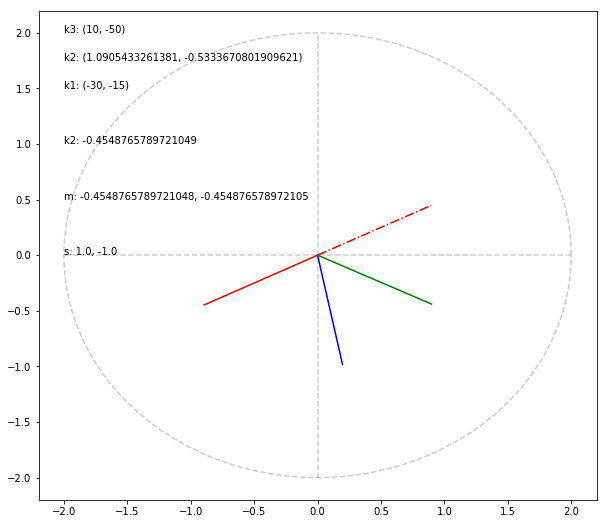

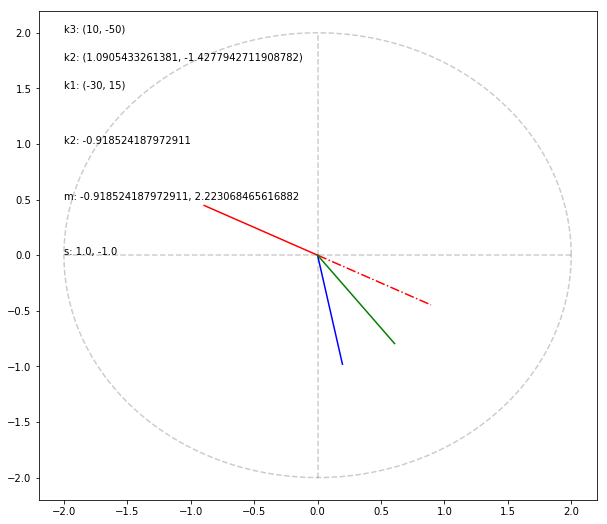

In [684]:
## k3 First quadrant
k3 = [10, 50]
k1 = [30, 15]
plot_triad_wave_vec(k3, k1)
plot_triad_wave_vec(k1, k3)
k1 = [30, -15]
plot_triad_wave_vec(k3, k1)
k1 = [-30, -15]
plot_triad_wave_vec(k3, k1)
k1 = [-30, 15]
plot_triad_wave_vec(k3, k1)


## k3 last quadrant
k3 = [10, -50]
k1 = [30, -15]
plot_triad_wave_vec(k3, k1)
plot_triad_wave_vec(k1, k3)
k1 = [30, 15]
plot_triad_wave_vec(k3, k1)
k1 = [-30, -15]
plot_triad_wave_vec(k3, k1)
k1 = [-30, 15]
plot_triad_wave_vec(k3, k1)

In [685]:
k3 = [10, 50]
k1 = [-30, -15]
k3 = np.array(k3)
k3 = k3/np.linalg.norm(k3)
k1 = np.array(k1)
k1 = k1/np.linalg.norm(k1)
k2 = k3 - k1
print(k2)
print(vec_angle(k2))
print(np.arctan2(k2[1], k2[0]))
print(vec_angle(k3))
print(np.arctan2(k3[1], k3[0]))
print(vec_angle(k1))
print(np.arctan2(k1[1], k1[0]))
print(np.sign(np.cross(k1, k2)))
print(np.sign(np.cross(k1, k3)))
print(np.sign(np.cross(k2, k3)))

[1.09054333 1.42779427]
0.918524187972911
0.918524187972911
1.373400766945016
1.373400766945016
-2.677945044588987
-2.677945044588987
-1.0
-1.0
1.0


In [686]:
(1.373400766945016 + (-2.677945044588987) + np.pi) / 2 

0.918524187972911

/home/ecarroll/ecpy/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/ecarroll/ecpy/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in cdouble_scalars
  if sys.path[0] == '':
/home/ecarroll/ecpy/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


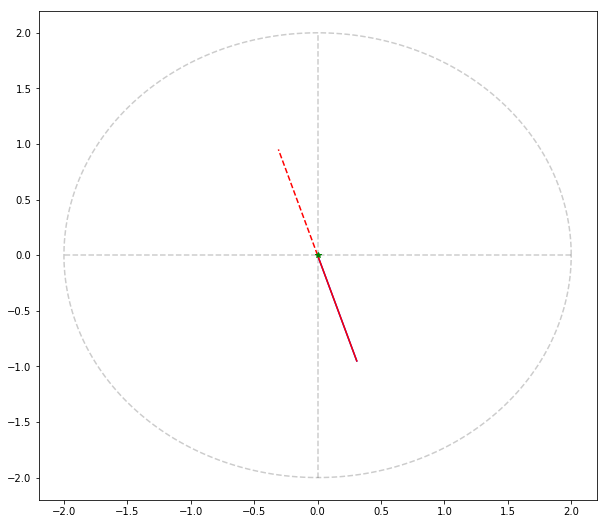

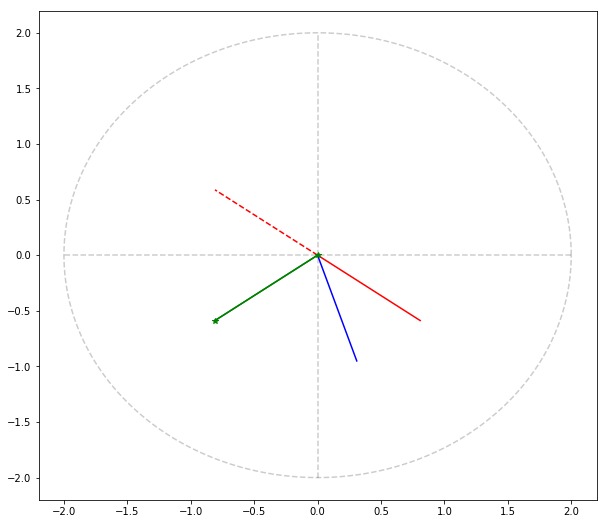

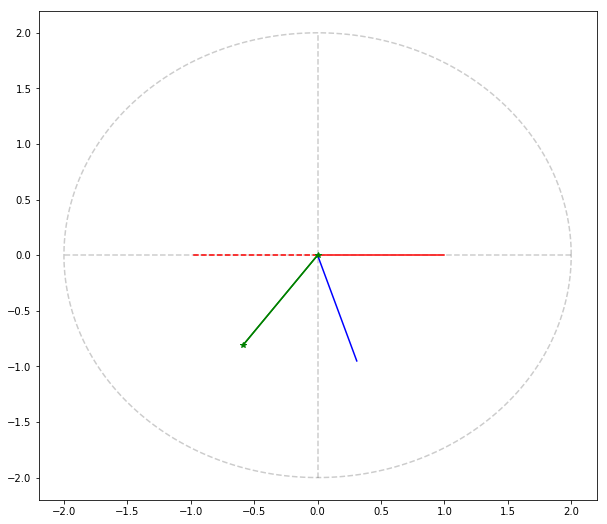

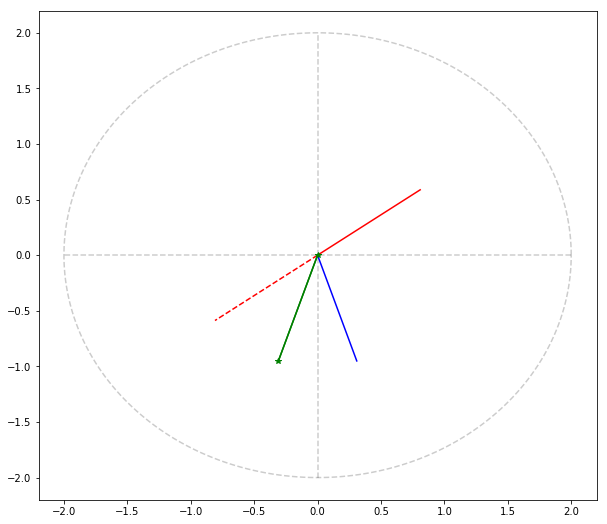

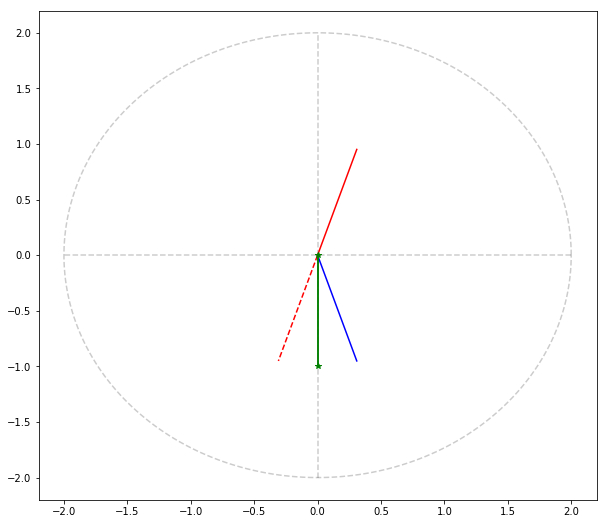

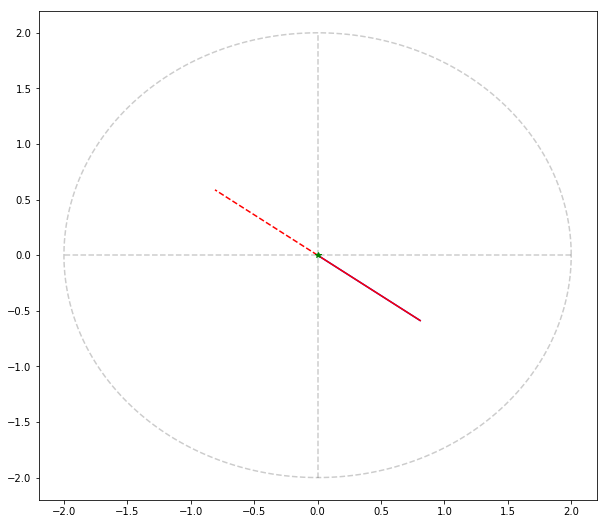

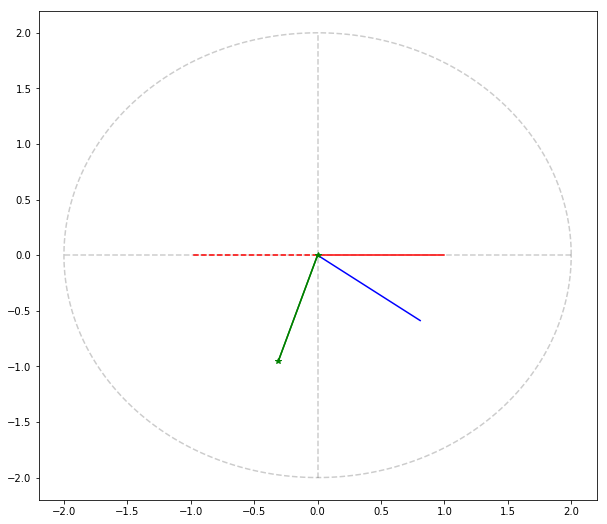

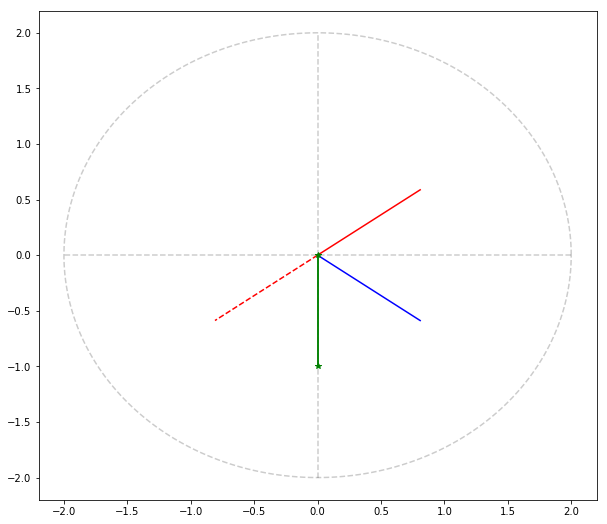

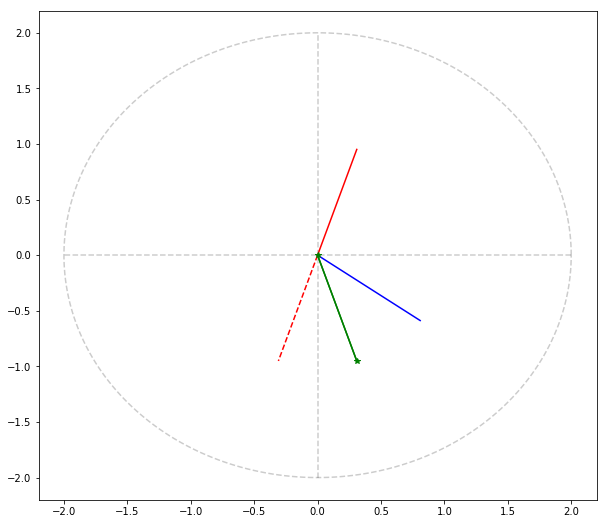

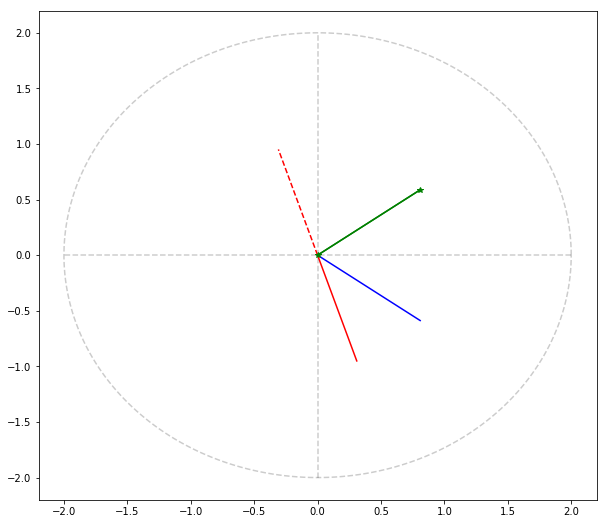

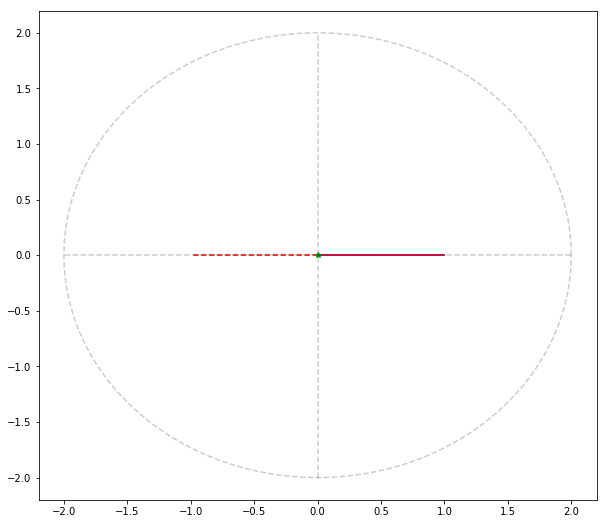

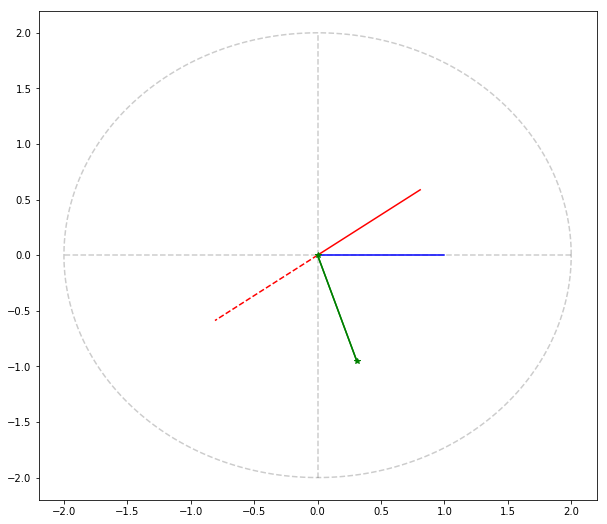

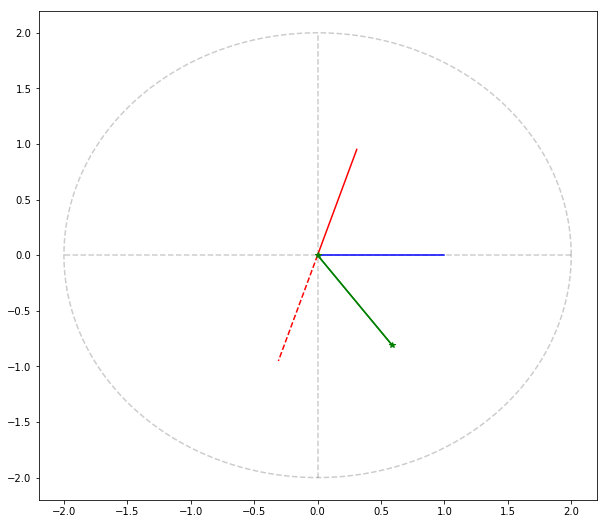

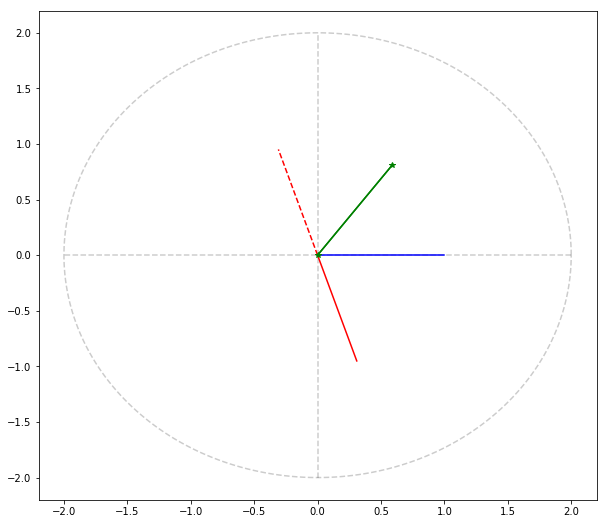

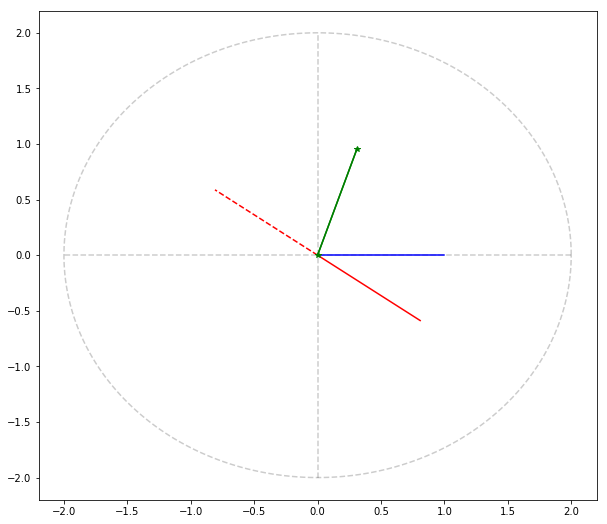

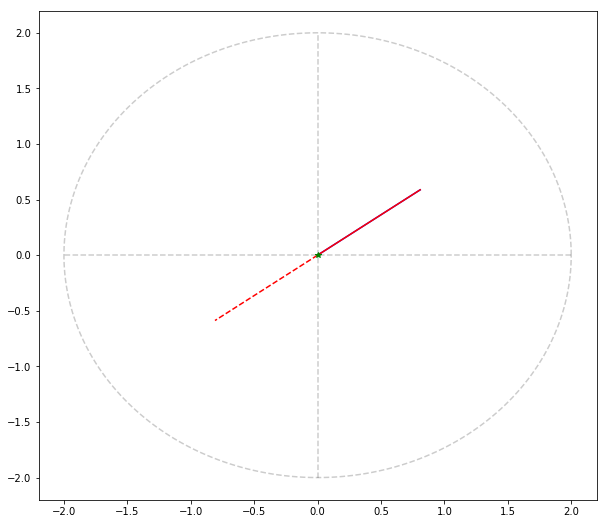

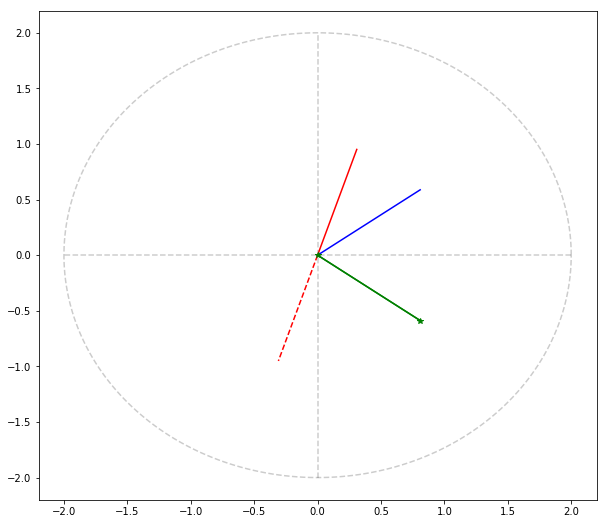

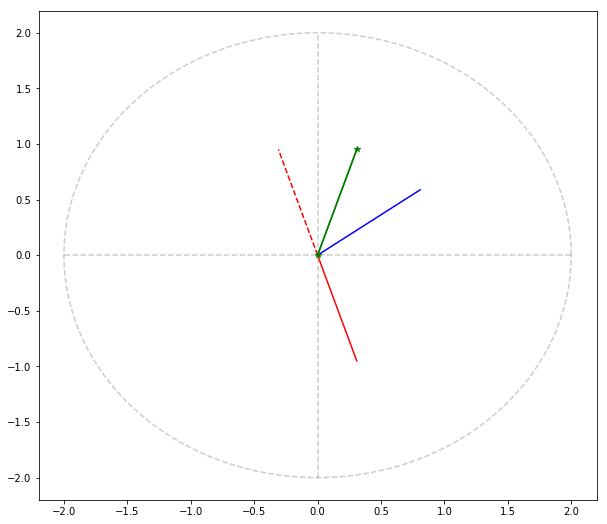

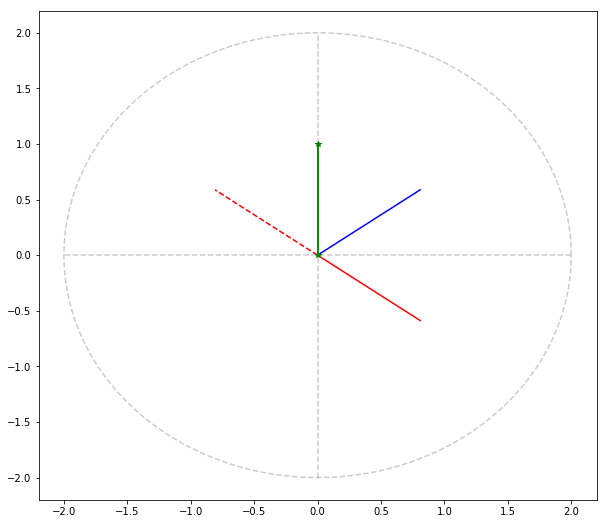

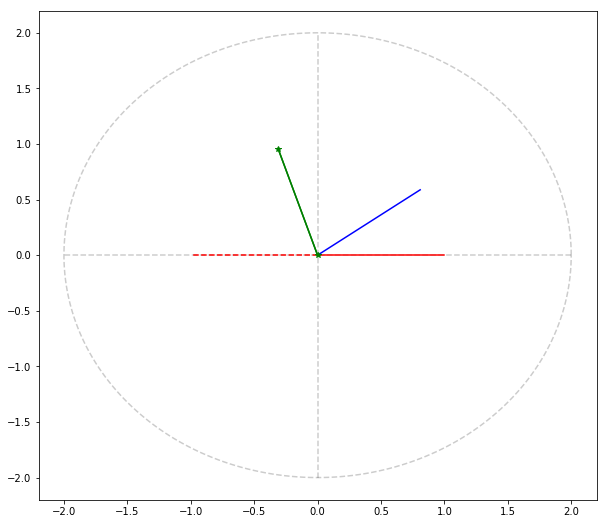

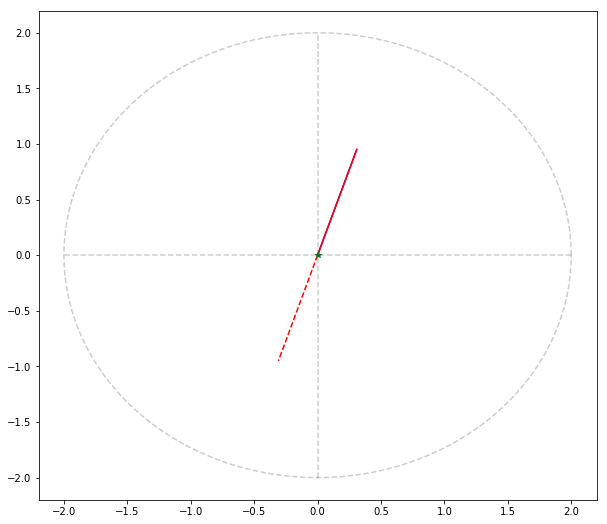

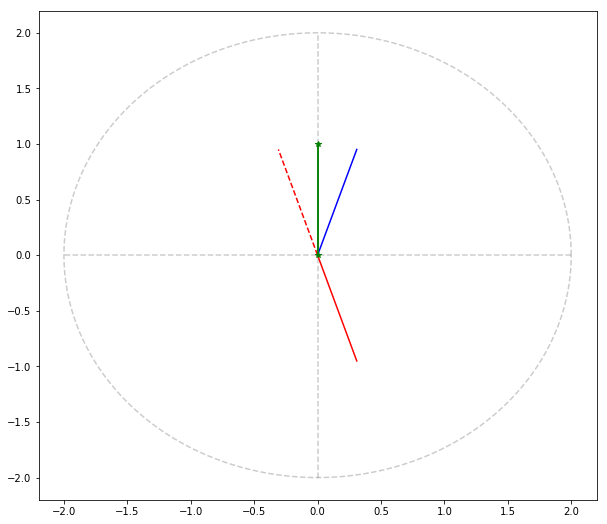

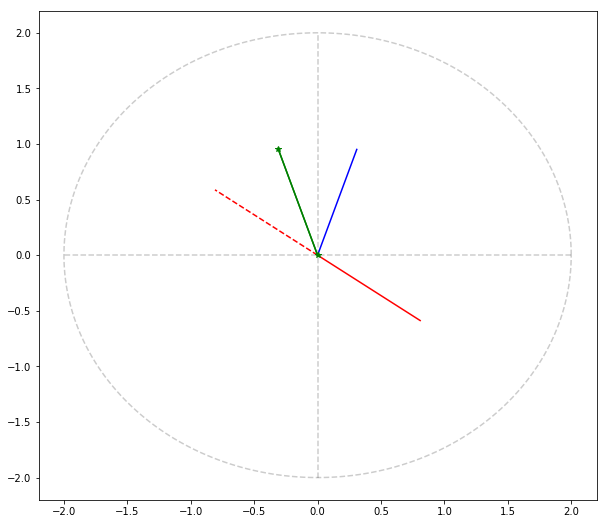

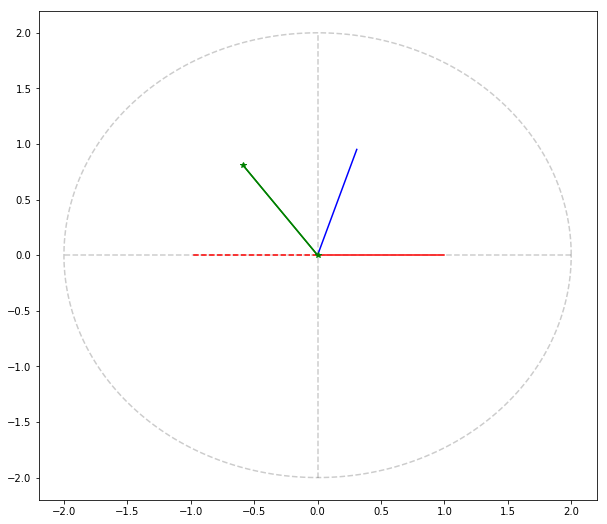

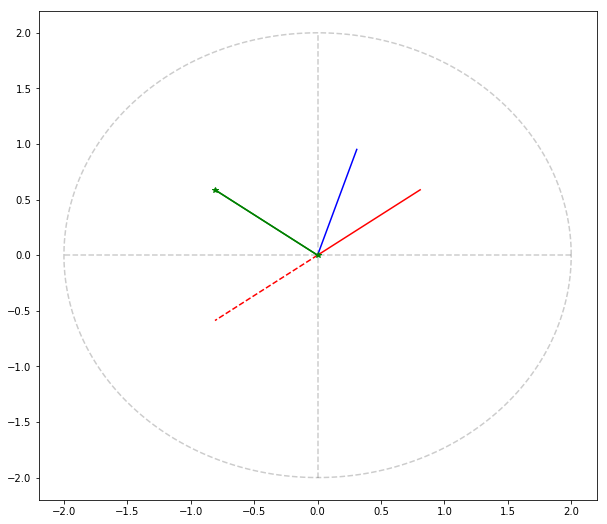

In [687]:
n_theta   = 5
dtheta    = np.pi / n_theta
theta     = np.arange(-np.pi/2, np.pi/2 + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5

for i in range(len(theta) - 1):
    for l in range(len(mid_theta)):
        vec3 = 1.0 * np.exp(1j * mid_theta[i])
        vec1 = 1.0 * np.exp(1j * mid_theta[np.mod(i + l, len(mid_theta))])
        
#         mid_sum = np.real(1 / np.complex(0.0, 2.0)*(np.log(np.complex(-k1[0], -k1[1]) + np.complex(k3[0], k3[1])) - np.log(np.complex(-k1[0], k1[1]) + np.complex(k3[0], -k3[1]))))
        mid_sum = np.real(1 / np.complex(0.0, 2.0)*(np.log(vec3 - vec1) - np.log(np.conjugate(vec3) - np.conjugate(vec1)))) 
        plt.figure(figsize = (10, 9))
        plt.plot(x, y, 'k--', alpha = 0.2)
        plt.plot([0, 0], [-R, R], 'k--', alpha = 0.2)
        plt.plot([R, -R], [0, 0], 'k--', alpha = 0.2)
        plt.plot([0, np.real(vec3)], [0, np.imag(vec3)], 'b')
        plt.plot([0, np.real(vec1)], [0, np.imag(vec1)], 'r')
        plt.plot([0, np.real(-vec1)], [0, np.imag(-vec1)], 'r--')

        plt.plot([0, np.real(vec3 - vec1)/ np.linalg.norm(vec3 - vec1)], [0, np.imag(vec3 - vec1)/ np.linalg.norm(vec3 - vec1)], 'g')
        plt.plot([0, np.real(1.0 * np.exp(1j * mid_sum))], [0, np.imag(1.0 * np.exp(1j * mid_sum))], 'g-*')
        plt.show()

# Putting It All together with k1 fixed to the right hand side only

In [688]:
n_theta   = 5
dtheta    = np.pi / n_theta
theta     = np.arange(-np.pi/2.0, np.pi/2.0 + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5

In [689]:
def check_sectork3(k):
    indx = 0
    for i in range(len(mid_theta)):
        if np.arctan2(k[1], k[0]) >= mid_theta[i] - dtheta / 2.0 and np.arctan2(k[1], k[0]) < mid_theta[i] + dtheta / 2.0:
            indx = i
            break
    return indx

def check_sectork1(k):
    indx = 0
    for i in range(len(mid_theta)):
        if (np.arctan2(k[1], k[0]) >= mid_theta[i] - dtheta / 2.0 and np.arctan2(k[1], k[0]) < mid_theta[i] + dtheta / 2.0) or (k[0] < 0 and np.arctan2(-k[1], -k[0]) >= mid_theta[i] - dtheta / 2.0 and np.arctan2(-k[1], -k[0]) < mid_theta[i] + dtheta / 2.0):
            indx = i
            break
    return indx

def check_sectork2(a):
    indx = 0
    for i in range(len(mid_theta)):
        if a >= mid_theta[i] - dtheta / 2.0 and a < mid_theta[i] + dtheta / 2.0:
            indx = i
            break
    return i
        

def plot_triad_wave_vec(k3_vec, k1_vec):
    ## Get k3 and sector
    k3x  = k3_vec[0]
    k3y  = k3_vec[1]
    k3   = np.array(k3_vec)
    k3   = k3/np.linalg.norm(k3)
    k3_i = check_sectork3(k3)
    
    ## Get k1 and sector
    k1x  = k1_vec[0]
    k1y  = k1_vec[1]
    k1   = np.array(k1_vec)
    k1   = k1/np.linalg.norm(k1)
    k1_i = check_sectork1(k1)
    
    ## Get k2
    k2   = k3 - k1
    k2x  = k2[0]
    k2y  = k2[1]
    k2   = k2 / np.linalg.norm(k2)
    if k2[0] < 0 and k2[1] > 0:
        k2_a = np.real(1 / np.complex(0.0, 2.0)*(np.log(np.exp(1j * mid_theta[k3_i]) - np.exp(1j * mid_theta[k1_i])) - np.log(np.exp(-1j * mid_theta[k3_i]) - np.exp(-1j * mid_theta[k1_i])))) - np.pi
    elif k2[0] < 0 and k2[1] < 0:
        k2_a = np.real(1 / np.complex(0.0, 2.0)*(np.log(np.exp(1j * mid_theta[k3_i]) - np.exp(1j * mid_theta[k1_i])) - np.log(np.exp(-1j * mid_theta[k3_i]) - np.exp(-1j * mid_theta[k1_i])))) + np.pi
    else:
        k2_a = np.real(1 / np.complex(0.0, 2.0)*(np.log(np.exp(1j * mid_theta[k3_i]) - np.exp(1j * mid_theta[k1_i])) - np.log(np.exp(-1j * mid_theta[k3_i]) - np.exp(-1j * mid_theta[k1_i]))))
    k2_i = check_sectork2(k2_a)

    
    
    plt.figure(figsize = (10, 9))
    plt.plot(x, y, 'k--', alpha = 0.2)
    plt.plot([0, 0], [-R, R], 'k--', alpha = 0.2)
    plt.plot([R, -R], [0, 0], 'k--', alpha = 0.2)
    plt.plot([0, k3[0]], [0, k3[1]], 'b')
    plt.plot([0, k1[0]], [0, k1[1]], 'r')
    plt.plot([0, -k1[0]], [0, -k1[1]], 'r-*')
    plt.plot([0, k2[0]], [0, k2[1]], 'g')
    plt.plot([0, np.cos(mid_theta[k3_i] - dtheta/2.0)], [0, np.sin(mid_theta[k3_i] - dtheta/2.0)], 'b--')
    plt.plot([0, np.cos(mid_theta[k3_i] + dtheta/2.0)], [0, np.sin(mid_theta[k3_i] + dtheta/2.0)], 'b--')
    plt.plot([0, np.cos(mid_theta[k3_i] - dtheta/2.0 + np.pi)], [0, np.sin(mid_theta[k3_i] - dtheta/2.0 + np.pi)], 'b-.')
#     plt.plot([0, np.cos(mid_theta[k3_i] + dtheta/2.0 + np.pi)], [0, np.sin(mid_theta[k3_i] + dtheta/2.0 + np.pi)], 'b-.')
    plt.plot([0, np.cos(mid_theta[k1_i] - dtheta/2.0)], [0, np.sin(mid_theta[k1_i] - dtheta/2.0)], 'r--')
    plt.plot([0, np.cos(mid_theta[k1_i] + dtheta/2.0)], [0, np.sin(mid_theta[k1_i] + dtheta/2.0)], 'r--')
#     plt.plot([0, np.cos(mid_theta[k1_i] - dtheta/2.0 + np.pi)], [0, np.sin(mid_theta[k1_i] - dtheta/2.0 + np.pi)], 'r-.')
#     plt.plot([0, np.cos(mid_theta[k1_i] + dtheta/2.0 + np.pi)], [0, np.sin(mid_theta[k1_i] + dtheta/2.0 + np.pi)], 'r-.')
    plt.plot([0, np.cos(mid_theta[k2_i] - dtheta/2.0)], [0, np.sin(mid_theta[k2_i] - dtheta/2.0)], 'g--')
    plt.plot([0, np.cos(mid_theta[k2_i] + dtheta/2.0)], [0, np.sin(mid_theta[k2_i] + dtheta/2.0)], 'g--')

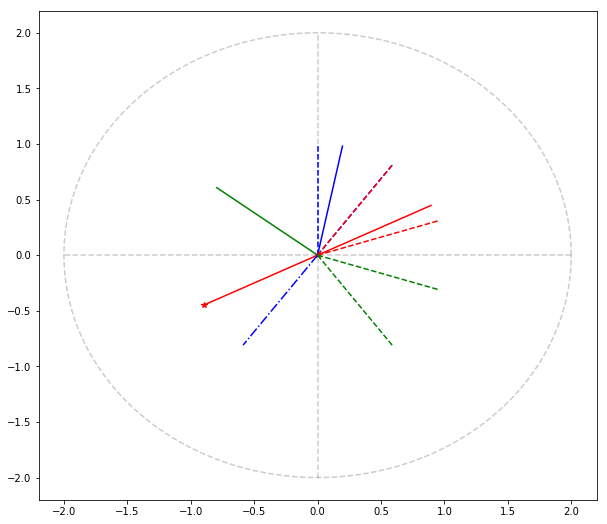

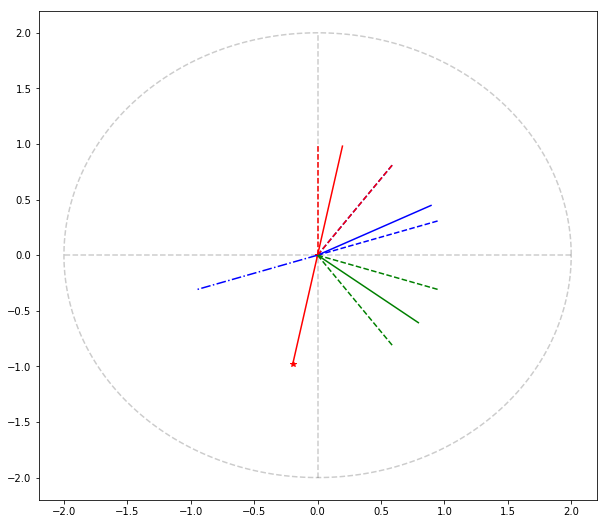

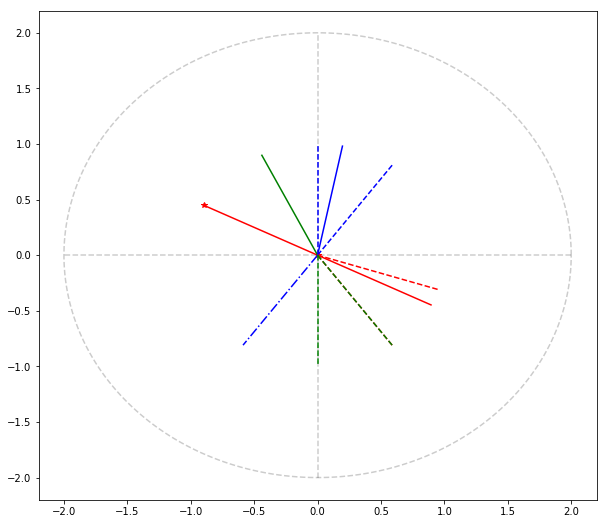

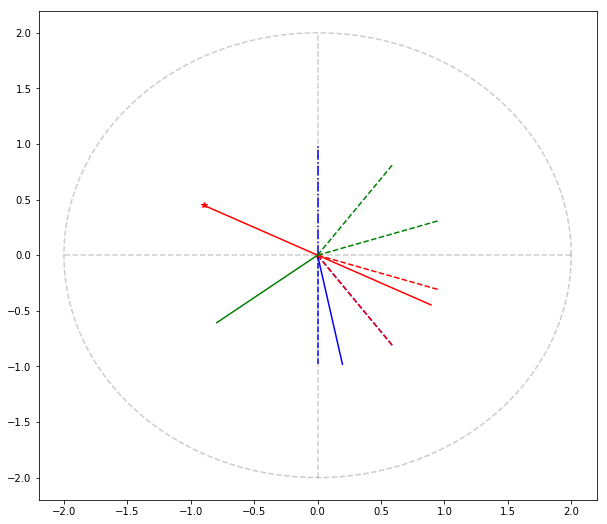

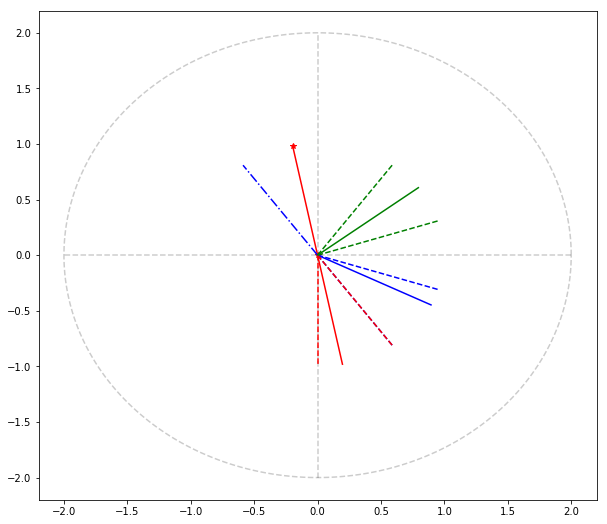

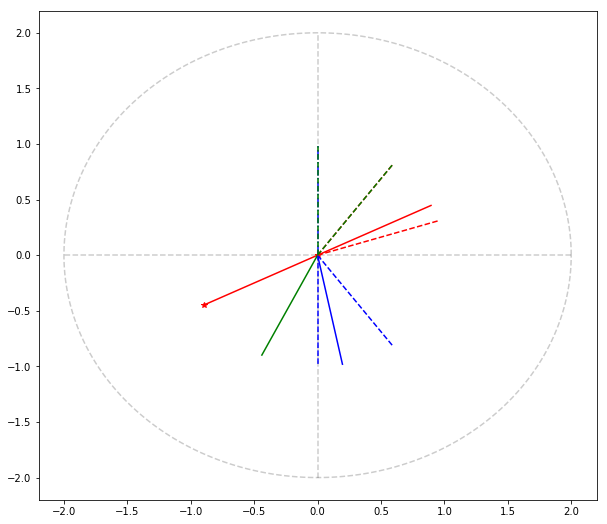

In [690]:
k3 = [10, 50]
k1 = [30, 15]
plot_triad_wave_vec(k3, k1)
plot_triad_wave_vec(k1, k3)
k1 = [30, -15]
plot_triad_wave_vec(k3, k1)
k3 = [10, -50]
k1 = [30, -15]
plot_triad_wave_vec(k3, k1)
plot_triad_wave_vec(k1, k3)
k1 = [30, 15]
plot_triad_wave_vec(k3, k1)

# Putting It All together with the Full Theta Domain

In [691]:
n_theta   = 10
dtheta    = np.pi / n_theta
theta     = np.arange(-np.pi, np.pi + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5

In [692]:
def check_sectork3(k):
    indx = 0
    for i in range(len(mid_theta)):
        if np.arctan2(k[1], k[0]) >= mid_theta[i] - dtheta / 2.0 and np.arctan2(k[1], k[0]) < mid_theta[i] + dtheta / 2.0:
            indx = i
            break
    return indx

def check_sectork1(k):
    indx = 0
    for i in range(len(mid_theta)):
        if (np.arctan2(k[1], k[0]) >= mid_theta[i] - dtheta / 2.0 and np.arctan2(k[1], k[0]) < mid_theta[i] + dtheta / 2.0): # or (k[0] < 0 and np.arctan2(-k[1], -k[0]) >= mid_theta[i] - dtheta / 2.0 and np.arctan2(-k[1], -k[0]) < mid_theta[i] + dtheta / 2.0):
            indx = i
            break
    return indx

def check_sectork2(a):
    indx = 0
    for i in range(len(mid_theta)):
        if a >= mid_theta[i] - dtheta / 2.0 and a < mid_theta[i] + dtheta / 2.0:
            indx = i
            break
    return i
        

def plot_triad_wave_vec(k3_vec, k1_vec):
    ## Get k3 and sector
    k3x  = k3_vec[0]
    k3y  = k3_vec[1]
    k3   = np.array(k3_vec)
    k3   = k3/np.linalg.norm(k3)
    k3_i = check_sectork3(k3)
    
    ## Get k1 and sector
    k1x  = k1_vec[0]
    k1y  = k1_vec[1]
    k1   = np.array(k1_vec)
    k1   = k1/np.linalg.norm(k1)
    k1_i = check_sectork1(k1)
    
    ## Get k2
    k2   = k3 - k1
    k2x  = k2[0]
    k2y  = k2[1]
    k2   = k2 / np.linalg.norm(k2)
    k2_a = np.real(1 / np.complex(0.0, 2.0)*(np.log(np.exp(1j * mid_theta[k3_i]) - np.exp(1j * mid_theta[k1_i])) - np.log(np.exp(-1j * mid_theta[k3_i]) - np.exp(-1j * mid_theta[k1_i]))))
    k2_i = check_sectork2(k2_a)
    
    plt.figure(figsize = (10, 9))
    plt.plot(x, y, 'k--', alpha = 0.2)
    plt.plot([0, 0], [-R, R], 'k--', alpha = 0.2)
    plt.plot([R, -R], [0, 0], 'k--', alpha = 0.2)
    plt.plot([0, k3[0]], [0, k3[1]], 'b')
    plt.plot([0, k1[0]], [0, k1[1]], 'r')
    plt.plot([0, -k1[0]], [0, -k1[1]], 'r-.')
    plt.plot([0, k2[0]], [0, k2[1]], 'g')
    plt.plot([0, np.cos(mid_theta[k3_i] - dtheta/2.0)], [0, np.sin(mid_theta[k3_i] - dtheta/2.0)], 'b--')
    plt.plot([0, np.cos(mid_theta[k3_i] + dtheta/2.0)], [0, np.sin(mid_theta[k3_i] + dtheta/2.0)], 'b--')
    plt.plot([0, np.cos(mid_theta[k1_i] - dtheta/2.0)], [0, np.sin(mid_theta[k1_i] - dtheta/2.0)], 'r--')
    plt.plot([0, np.cos(mid_theta[k1_i] + dtheta/2.0)], [0, np.sin(mid_theta[k1_i] + dtheta/2.0)], 'r--')
    plt.plot([0, np.cos(mid_theta[k2_i] - dtheta/2.0)], [0, np.sin(mid_theta[k2_i] - dtheta/2.0)], 'g--')
    plt.plot([0, np.cos(mid_theta[k2_i] + dtheta/2.0)], [0, np.sin(mid_theta[k2_i] + dtheta/2.0)], 'g--')

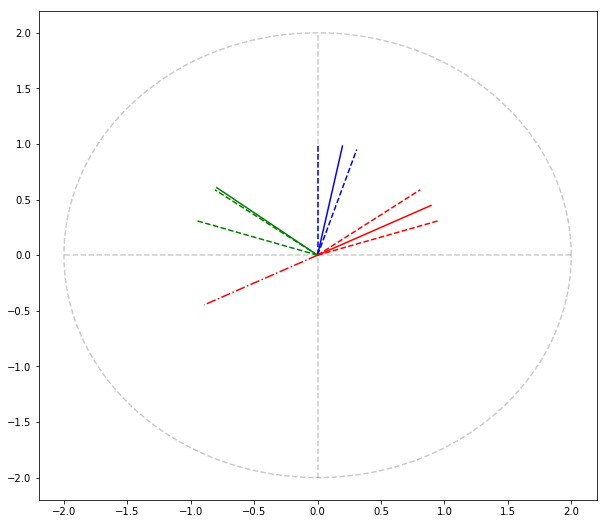

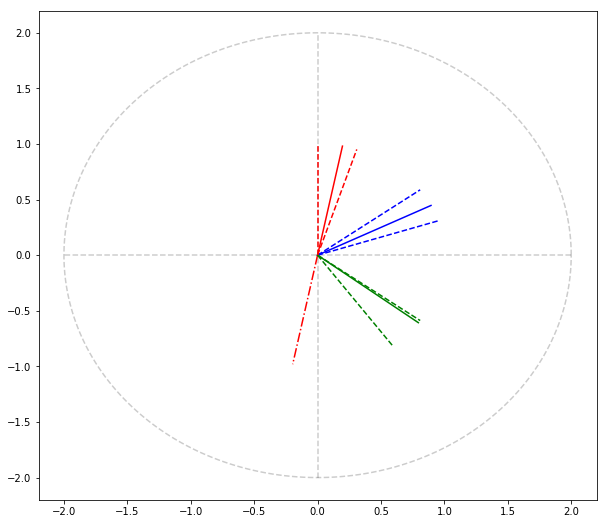

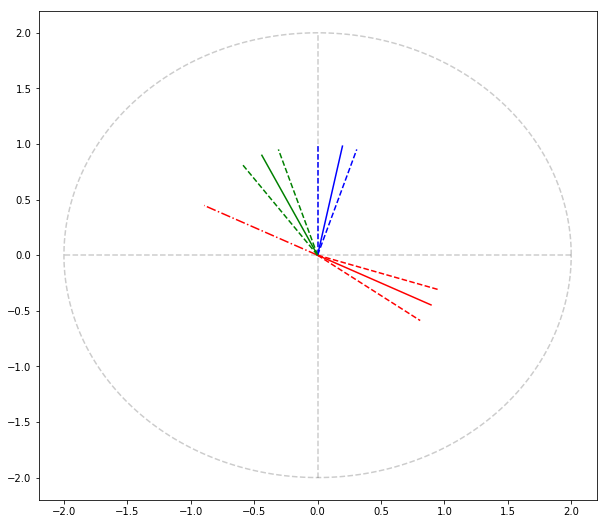

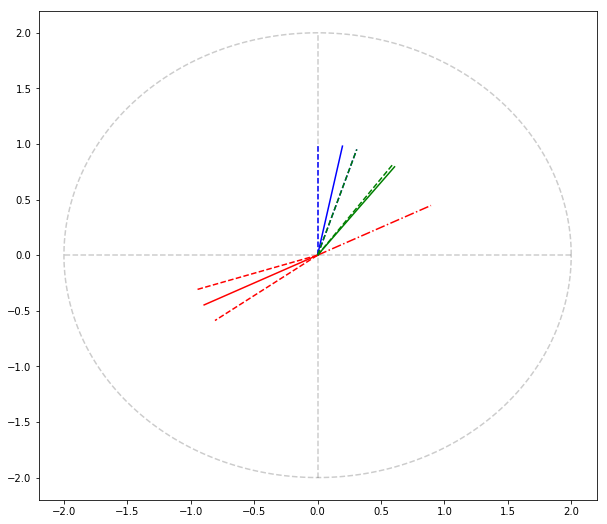

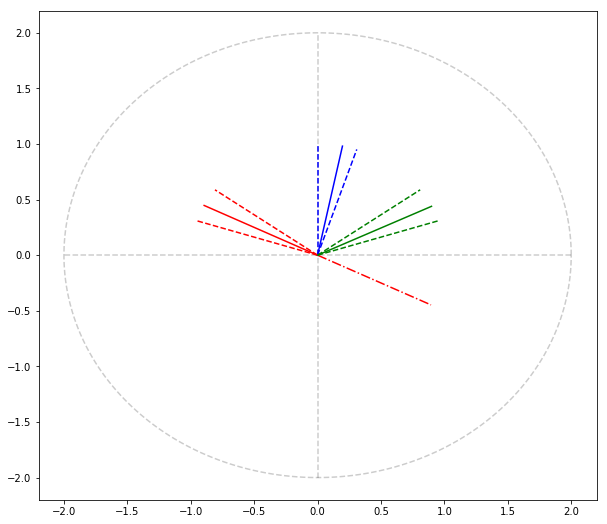

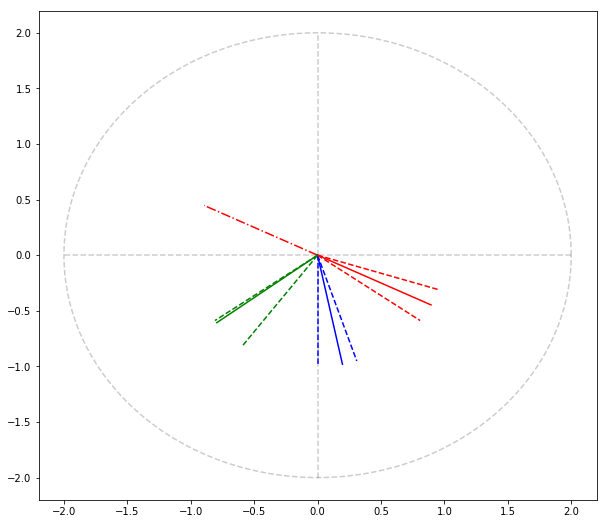

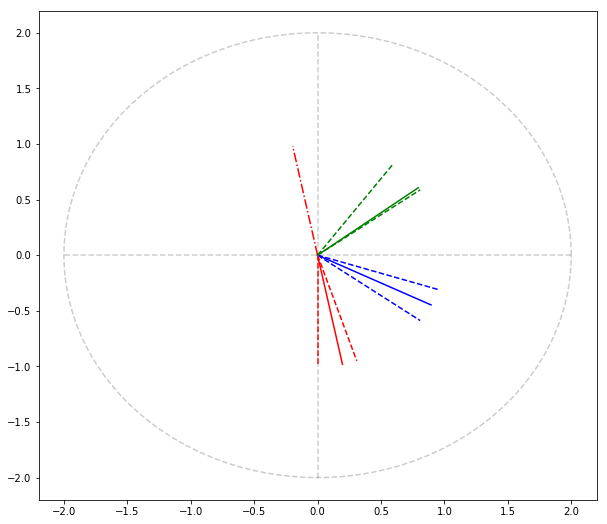

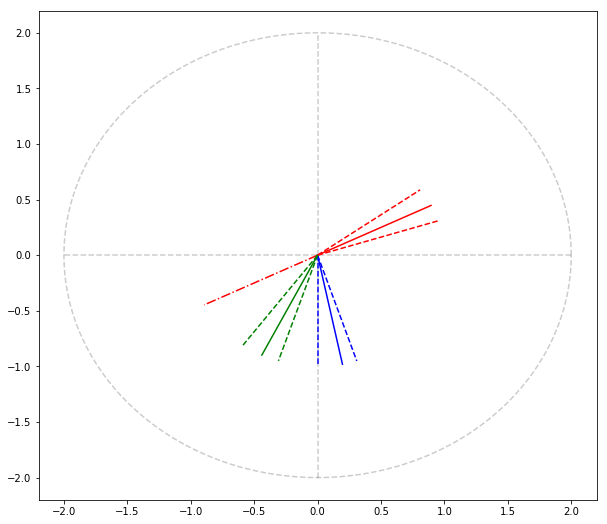

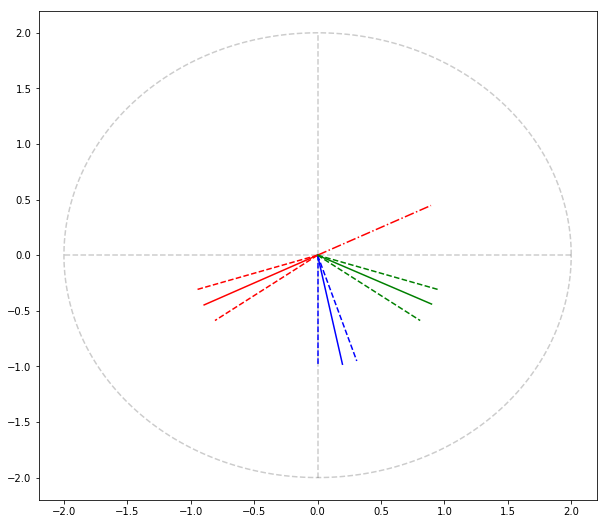

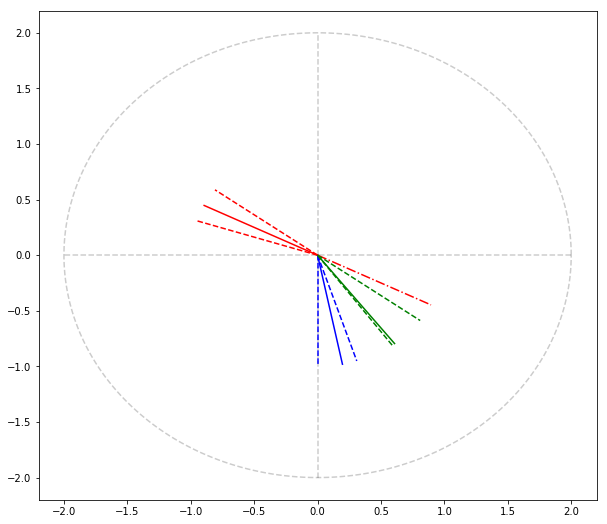

In [693]:
## k3 First quadrant
k3 = [10, 50]
k1 = [30, 15]
plot_triad_wave_vec(k3, k1)
plot_triad_wave_vec(k1, k3)
k1 = [30, -15]
plot_triad_wave_vec(k3, k1)
k1 = [-30, -15]
plot_triad_wave_vec(k3, k1)
k1 = [-30, 15]
plot_triad_wave_vec(k3, k1)

# ## k3 last quadrant
k3 = [10, -50]
k1 = [30, -15]
plot_triad_wave_vec(k3, k1)
plot_triad_wave_vec(k1, k3)
k1 = [30, 15]
plot_triad_wave_vec(k3, k1)
k1 = [-30, -15]
plot_triad_wave_vec(k3, k1)
k1 = [-30, 15]
plot_triad_wave_vec(k3, k1)

In [694]:
import h5py

In [695]:
kmax = int(64 / 3)
phases = np.zeros((10, int(2 * kmax - 1), int(2 * kmax - 1)))
amps   = np.zeros((10, int(2 * kmax - 1), int(2 * kmax - 1)))
print(kmax)
print(phases.shape)
print(amps.shape)

with h5py.File("../Data/Tmp/SIM_DATA_NAVIER_RK4_FULL_N[64,64]_T[0-1]_NU[0.000000]_CFL[1.73]_u0[DECAY_TURB]_TAG[Decay-Test]/PostProcessing_HDF_Data_SECTORS[10]_KFRAC[0.50].h5", 'r') as file:
    ## Initialize counter
        nn = 0

        # Read in the spectra
        for group in file.keys():
            if "Snap" in group:
                if 'FullFieldPhases' in list(file[group].keys()):
                    phases[nn, :] = file[group]["FullFieldPhases"][:, :]
                if 'FullFieldPhases' in list(file[group].keys()):
                    amps[nn, :] = file[group]["FullFieldAmplitudes"][:, :]

21
(10, 41, 41)
(10, 41, 41)


In [696]:
def check_sectork2(k):
    indx = 0
    for i in range(len(mid_theta)):
        if np.arctan2(k[1], k[0]) >= mid_theta[i] - dtheta / 2.0 and np.arctan2(k[1], k[0]) < mid_theta[i] + dtheta / 2.0:
            indx = i
            break
    return indx

def check_sectork1(k):
    indx = 0
    for i in range(len(mid_theta)):
        if (np.arctan2(k[1], k[0]) >= mid_theta[i] - dtheta / 2.0 and np.arctan2(k[1], k[0]) < mid_theta[i] + dtheta / 2.0): # or (k[0] < 0 and np.arctan2(-k[1], -k[0]) >= mid_theta[i] - dtheta / 2.0 and np.arctan2(-k[1], -k[0]) < mid_theta[i] + dtheta / 2.0):
            indx = i
            break
    return indx

def check_sectork3(a):
    indx = 0
    for i in range(len(mid_theta)):
        if a >= mid_theta[i] - dtheta / 2.0 and a < mid_theta[i] + dtheta / 2.0:
            indx = i
            break
    return i


def plot_triad_wave_vec_compare(k1_vec, k2_vec):
    t = 0
    
    ## Get k3 and sector
    k2x  = k2_vec[0]
    k2y  = k2_vec[1]
    k2   = np.array(k2_vec)
    k2   = k2/np.linalg.norm(k2)
    k2_i = check_sectork2(k2)
    
    ## Get k1 and sector
    k1x  = k1_vec[0]
    k1y  = k1_vec[1]
    k1   = np.array(k1_vec)
    k1   = k1/np.linalg.norm(k1)
    k1_i = check_sectork1(k1)
    
    ## Get k2
    k3   = k1 + k2
    k3x  = k3[0]
    k3y  = k3[1]
    k3   = k3 / np.linalg.norm(k3)
    k3_a = np.real(1 / np.complex(0.0, 2.0)*(np.log(np.exp(1j * mid_theta[k1_i]) + np.exp(1j * mid_theta[k2_i])) - np.log(np.exp(-1j * mid_theta[k1_i]) + np.exp(-1j * mid_theta[k2_i]))))
    k3_i = check_sectork3(k3_a)
    
    if (k1_vec[0]**2 + k1_vec[1]**2) >= kmax ** 2 and (k2_vec[0]**2 + k2_vec[1]**2) >= kmax ** 2 and (k3_vec[0]**2 + k3_vec[1]**2) >= kmax ** 2:
        print("try different wavenumbers")
    else:    
        ## Get the prefactor, flux weight, flux and triad
        k3_vec      = np.array(k1_vec) + np.array(k2_vec)
        print(k3_vec)
        pre_fac     = np.cross(k1_vec, k2_vec)
        flux_weight = pre_fac * (1. / (k1_vec[0]**2 + k1_vec[1]**2) - (k2_vec[0]**2 + k2_vec[1]**2)) * amps[t, kmax - 1 - k1_vec[0], kmax - 1 + k1_vec[1]] * amps[t, kmax - 1 - k2_vec[0], kmax - 1 + k2_vec[1]] * amps[t, kmax - 1 - k3_vec[0], kmax - 1 + k3_vec[1]]
        triad_phase = phases[t, kmax - 1 - k1_vec[0], kmax - 1 + k1_vec[1]] * phases[t, kmax - 1 - k2_vec[0], kmax - 1 + k2_vec[1]] * phases[t, kmax - 1 - k3_vec[0], kmax - 1 + k3_vec[1]]
        flux        = flux_weight * np.cos(triad_phase)

        fig, ax = plt.subplots(1, 2, figsize = (18, 9))
        ax[0].plot(x, y, 'k--', alpha = 0.2)
        ax[0].plot([0, 0], [-R, R], 'k--', alpha = 0.2)
        ax[0].plot([R, -R], [0, 0], 'k--', alpha = 0.2)
        ax[0].plot([0, k3[0]], [0, k3[1]], 'b')
        ax[0].plot([0, k1[0]], [0, k1[1]], 'r')
#         ax[0].plot([0, -k1[0]], [0, -k1[1]], 'r-.')
        ax[0].plot([0, k2[0]], [0, k2[1]], 'g')
        ax[0].plot([0, np.cos(mid_theta[k3_i] - dtheta/2.0)], [0, np.sin(mid_theta[k3_i] - dtheta/2.0)], 'b--')
        ax[0].plot([0, np.cos(mid_theta[k3_i] + dtheta/2.0)], [0, np.sin(mid_theta[k3_i] + dtheta/2.0)], 'b--')
        ax[0].plot([0, np.cos(mid_theta[k1_i] - dtheta/2.0)], [0, np.sin(mid_theta[k1_i] - dtheta/2.0)], 'r--')
        ax[0].plot([0, np.cos(mid_theta[k1_i] + dtheta/2.0)], [0, np.sin(mid_theta[k1_i] + dtheta/2.0)], 'r--')
        ax[0].plot([0, np.cos(mid_theta[k2_i] - dtheta/2.0)], [0, np.sin(mid_theta[k2_i] - dtheta/2.0)], 'g--')
        ax[0].plot([0, np.cos(mid_theta[k2_i] + dtheta/2.0)], [0, np.sin(mid_theta[k2_i] + dtheta/2.0)], 'g--')
        ax[0].text(x = -2, y = 2, s = "k3: ({}, {})".format(k3_vec[0], k3_vec[1]))
        ax[0].text(x = -2, y = 1.75, s = "k2: ({}, {})".format(k2_vec[0], k2_vec[1]))
        ax[0].text(x = -2, y = 1.5, s = "k1: ({}, {})".format(k1x, k1y))
        ax[0].text(x = -2, y = 1, s = "pre: {}".format(pre_fac))
        ax[0].text(x = -2, y = 0.75, s = "wght: {}".format(flux_weight))
        ax[0].text(x = -2, y = 0.5, s = "triad: {}".format(triad_phase))
        ax[0].text(x = -2, y = 0.25, s = "flux: {}".format(flux))

        ## Swap vectors
        tmp    = k1_vec
        k1_vec = k2_vec
        k2_vec = tmp

        ## Get k3 and sector
        k2x  = k2_vec[0]
        k2y  = k2_vec[1]
        k2   = np.array(k2_vec)
        k2   = k2/np.linalg.norm(k2)
        k2_i = check_sectork2(k2)

        ## Get k1 and sector
        k1x  = k1_vec[0]
        k1y  = k1_vec[1]
        k1   = np.array(k1_vec)
        k1   = k1/np.linalg.norm(k1)
        k1_i = check_sectork1(k1)

        ## Get k2
        k3   = k2 + k1
        k3x  = k3[0]
        k3y  = k3[1]
        k3   = k3 / np.linalg.norm(k3)
        k3_a = np.real(1 / np.complex(0.0, 2.0)*(np.log(np.exp(1j * mid_theta[k1_i]) + np.exp(1j * mid_theta[k2_i])) - np.log(np.exp(-1j * mid_theta[k1_i]) + np.exp(-1j * mid_theta[k2_i]))))
        k3_i = check_sectork3(k3_a)

        ## Get the prefactor, flux weight, flux and triad
        k3_vec      = np.array(k1_vec) + np.array(k2_vec)
        print(k3_vec)
        pre_fac     = np.cross(k1_vec, k2_vec)
        flux_weight = pre_fac * (1. / (k1_vec[0]**2 + k1_vec[1]**2) - (k2_vec[0]**2 + k2_vec[1]**2)) * amps[t, kmax - 1 - k1_vec[0], kmax - 1 + k1_vec[1]] * amps[t, kmax - 1 - k2_vec[0], kmax - 1 + k2_vec[1]] * amps[t, kmax - 1 - k3_vec[0], kmax - 1 + k3_vec[1]]
        triad_phase = phases[t, kmax - 1 - k1_vec[0], kmax - 1 + k1_vec[1]] * phases[t, kmax - 1 - k2_vec[0], kmax - 1 + k2_vec[1]] * phases[t, kmax - 1 - k3_vec[0], kmax - 1 + k3_vec[1]]
        flux        = flux_weight * np.cos(triad_phase)

        ax[1].plot(x, y, 'k--', alpha = 0.2)
        ax[1].plot([0, 0], [-R, R], 'k--', alpha = 0.2)
        ax[1].plot([R, -R], [0, 0], 'k--', alpha = 0.2)
        ax[1].plot([0, k3[0]], [0, k3[1]], 'b')
        ax[1].plot([0, k1[0]], [0, k1[1]], 'r')
#         ax[1].plot([0, -k1[0]], [0, -k1[1]], 'r-.')
        ax[1].plot([0, k2[0]], [0, k2[1]], 'g')
        ax[1].plot([0, np.cos(mid_theta[k3_i] - dtheta/2.0)], [0, np.sin(mid_theta[k3_i] - dtheta/2.0)], 'b--')
        ax[1].plot([0, np.cos(mid_theta[k3_i] + dtheta/2.0)], [0, np.sin(mid_theta[k3_i] + dtheta/2.0)], 'b--')
        ax[1].plot([0, np.cos(mid_theta[k1_i] - dtheta/2.0)], [0, np.sin(mid_theta[k1_i] - dtheta/2.0)], 'r--')
        ax[1].plot([0, np.cos(mid_theta[k1_i] + dtheta/2.0)], [0, np.sin(mid_theta[k1_i] + dtheta/2.0)], 'r--')
        ax[1].plot([0, np.cos(mid_theta[k2_i] - dtheta/2.0)], [0, np.sin(mid_theta[k2_i] - dtheta/2.0)], 'g--')
        ax[1].plot([0, np.cos(mid_theta[k2_i] + dtheta/2.0)], [0, np.sin(mid_theta[k2_i] + dtheta/2.0)], 'g--')
        ax[1].text(x = -2, y = 2, s = "k3: ({}, {})".format(k3_vec[0], k3_vec[0]))
        ax[1].text(x = -2, y = 1.75, s = "k2: ({}, {})".format(k2_vec[0], k2_vec[1]))
        ax[1].text(x = -2, y = 1.5, s = "k1: ({}, {})".format(k1x, k1y))
        ax[1].text(x = -2, y = 1, s = "pre: {}".format(pre_fac))
        ax[1].text(x = -2, y = 0.75, s = "wght: {}".format(flux_weight))
        ax[1].text(x = -2, y = 0.5, s = "triad: {}".format(triad_phase))
        ax[1].text(x = -2, y = 0.25, s = "flux: {}".format(flux))

[10 15]
[10 15]
[10  5]
[10  5]
[-6  5]
[-6  5]
[-6 15]
[-6 15]


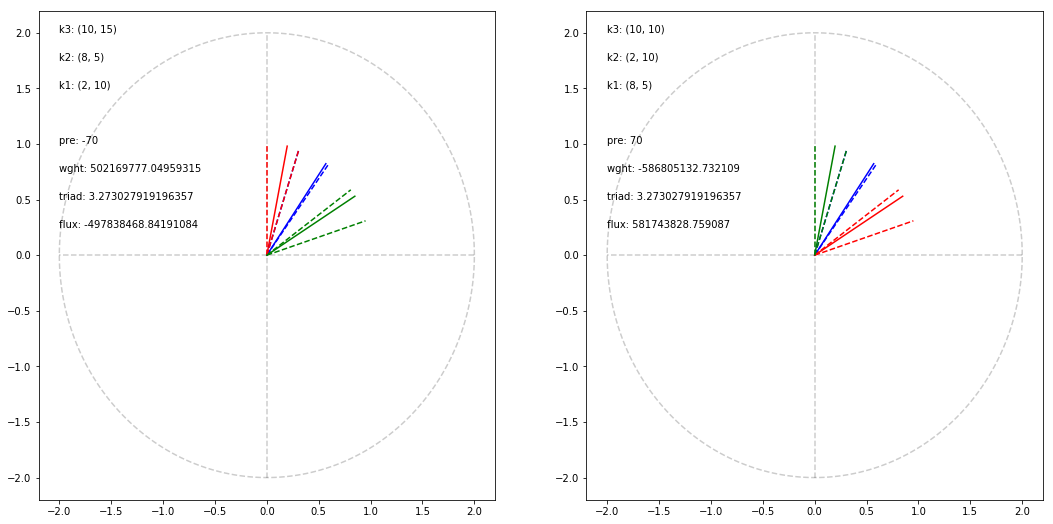

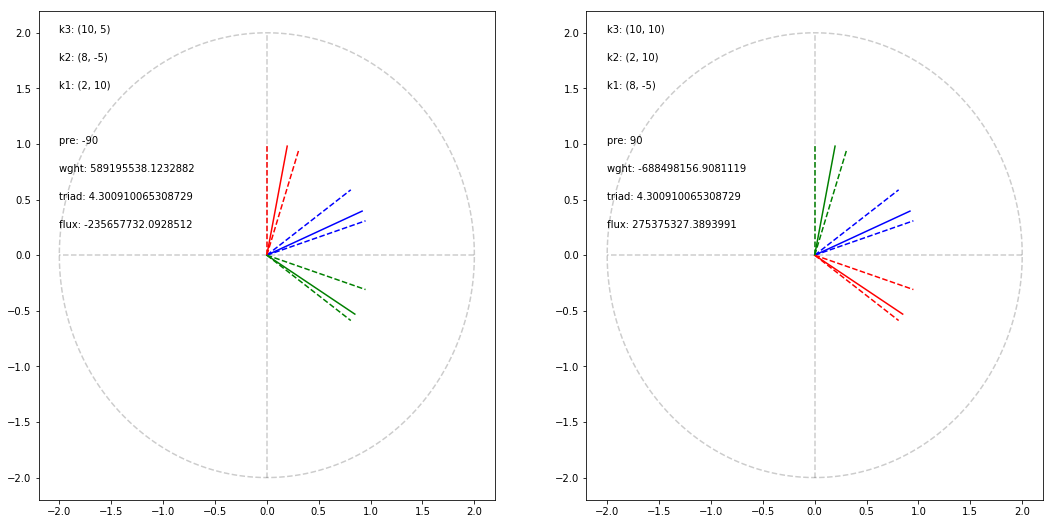

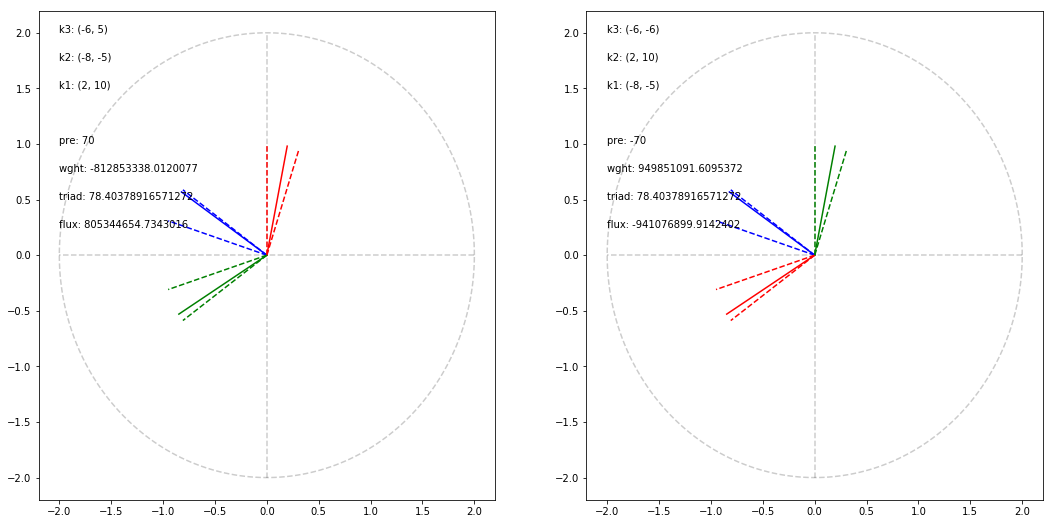

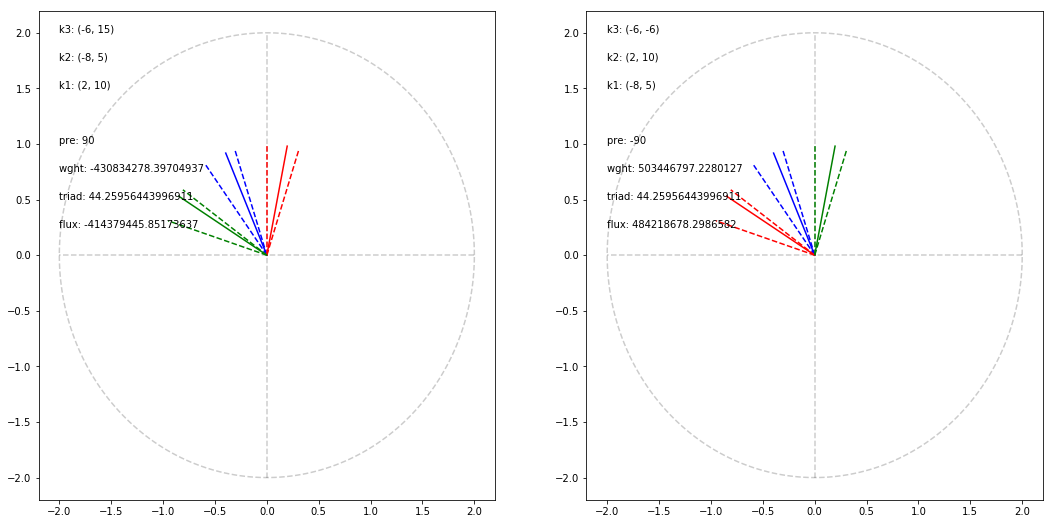

In [697]:
k3 = [2, 10]
k1 = [8, 5]
plot_triad_wave_vec_compare(k3, k1)
k1 = [8, -5]
plot_triad_wave_vec_compare(k3, k1)
k1 = [-8, -5]
plot_triad_wave_vec_compare(k3, k1)
k1 = [-8, 5]
plot_triad_wave_vec_compare(k3, k1)

In [698]:
for i in range(2 * kmax - 1):
    for j in range(2 * kmax - 1):
        print("{} ".format(phases[5, i, j]), end = "")
    print()

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.

# k1 only at certain angles

In [699]:
n_theta   = 24
dtheta    = np.pi / n_theta
theta     = np.arange(-np.pi/2.0, np.pi/2.0 + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5

In [700]:
k3 = [2, 1]
k1 = [8, 5]

0.9872463845991049
1.2490457723982544
1.5108451601974038
2.0344439357957027
-0.05995116659749272
-0.3217505543966422
-0.5835499421957915
-1.1071487177940904


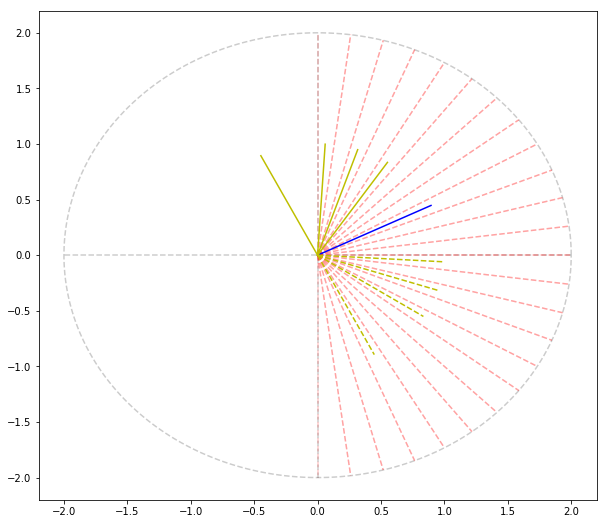

In [701]:
k3   = np.array(k3)
k3   = k3 / np.linalg.norm(k3)
k3_i = np.complex(k3[0], k3[1])
# k1   = np.array(k1)
# k1   = k1 / np.linalg.norm(k1)
# k1_i = np.complex(k1[0], k1[1])

plt.figure(figsize = (10, 9))
plt.plot(x, y, 'k--', alpha = 0.2)
plt.plot([0, 0], [-R, R], 'k--', alpha = 0.2)
plt.plot([R, -R], [0, 0], 'k--', alpha = 0.2)
for a in range(mid_theta.shape[0]):
    ## Plot sectors
    plt.plot([0, R*np.cos(mid_theta[a] - dtheta/2)], [0, R*np.sin(mid_theta[a] - dtheta/2)], 'r--', alpha = 0.2)
    plt.plot([0, R*np.cos(mid_theta[a] + dtheta/2)], [0, R*np.sin(mid_theta[a] + dtheta/2)], 'r--', alpha = 0.2)
## Plot k3
plt.plot([0, k3[0]], [0, k3[1]], 'b')
## Plot k1 at 30 degrees
k1 = np.absolute(k3_i) * np.exp(1j * (np.angle(k3_i) + (n_theta/6) * dtheta))
plt.plot([0, np.real(k1)], [0, np.imag(k1)], 'y')
## Plot k1 at 45 degrees
k1 = np.absolute(k3_i) * np.exp(1j * (np.angle(k3_i) + (n_theta/4) * dtheta))
plt.plot([0, np.real(k1)], [0, np.imag(k1)], 'y')
## Plot k1 at 60 degrees
k1 = np.absolute(k3_i) * np.exp(1j * (np.angle(k3_i) + (n_theta/3) * dtheta))
plt.plot([0, np.real(k1)], [0, np.imag(k1)], 'y')
## Plot k1 at 90 degrees
k1 = np.absolute(k3_i) * np.exp(1j * (np.angle(k3_i) + (n_theta/2) * dtheta))
plt.plot([0, np.real(k1)], [0, np.imag(k1)], 'y')
## Plot k1 at 30 degrees
k1 = np.absolute(k3_i) * np.exp(1j * (np.angle(k3_i) - (n_theta/6) * dtheta))
plt.plot([0, np.real(k1)], [0, np.imag(k1)], 'y--')
## Plot k1 at 45 degrees
k1 = np.absolute(k3_i) * np.exp(1j * (np.angle(k3_i) - (n_theta/4) * dtheta))
plt.plot([0, np.real(k1)], [0, np.imag(k1)], 'y--')
## Plot k1 at 60 degrees
k1 = np.absolute(k3_i) * np.exp(1j * (np.angle(k3_i) - (n_theta/3) * dtheta))
plt.plot([0, np.real(k1)], [0, np.imag(k1)], 'y--')
## Plot k1 at 90 degrees
k1 = np.absolute(k3_i) * np.exp(1j * (np.angle(k3_i) - (n_theta/2) * dtheta))
plt.plot([0, np.real(k1)], [0, np.imag(k1)], 'y--')

print( np.angle(k3_i) + (n_theta/6) * dtheta)
print( np.angle(k3_i) + (n_theta/4) * dtheta)
print( np.angle(k3_i) + (n_theta/3) * dtheta)
print( np.angle(k3_i) + (n_theta/2) * dtheta)
print( np.angle(k3_i) - (n_theta/6) * dtheta)
print( np.angle(k3_i) - (n_theta/4) * dtheta)
print( np.angle(k3_i) - (n_theta/3) * dtheta)
print( np.angle(k3_i) - (n_theta/2) * dtheta)    

In [752]:
## Theta angles
n_theta   = 24
dtheta    = np.pi / n_theta
theta     = np.arange(-np.pi/2.0, np.pi/2.0 + dtheta, dtheta)
mid_theta = (theta[1:] + theta[:-1]) * 0.5
theta = mid_theta[:]

## k1 sector angles
k1_sect_angles = [-(n_theta/2), -(n_theta/3), -(n_theta/4), -(n_theta/6) , (n_theta/6), (n_theta/4), (n_theta/3), (n_theta/2)]

In [756]:
for a in range(n_theta):
    for l in range(len(k1_sect_angles)):
        k3 = np.exp(1j * theta[a])
        k1 = np.exp(1j * (theta[a] + k1_sect_angles[l] * dtheta))
        
        mid_angle = np.real(1.0 / (2.0 * 1j) * (np.log(k3 - k1) - np.log(np.conjugate(k3) - np.conjugate(k1))))
        
        print("a: {} l: {} k1: {} \t dtheta: {} \t | theta: {:0.16f} \t k1 + theta: {:0.16f} \tmid: {:0.16f}".format(a, l, k1_sect_angles[l], dtheta, theta[a], theta[a] + k1_sect_angles[l] * dtheta, mid_angle))
    print()

a: 0 l: 0 k1: -12.0 	 dtheta: 0.1308996938995747 	 | theta: -1.5053464798451093 	 k1 + theta: -3.0761428066400058 	mid: -0.7199483164476609
a: 0 l: 1 k1: -8.0 	 dtheta: 0.1308996938995747 	 | theta: -1.5053464798451093 	 k1 + theta: -2.5525440310417071 	mid: -0.4581489286485115
a: 0 l: 2 k1: -6.0 	 dtheta: 0.1308996938995747 	 | theta: -1.5053464798451093 	 k1 + theta: -2.2907446432425576 	mid: -0.3272492347489368
a: 0 l: 3 k1: -4.0 	 dtheta: 0.1308996938995747 	 | theta: -1.5053464798451093 	 k1 + theta: -2.0289452554434080 	mid: -0.1963495408493620
a: 0 l: 4 k1: 4.0 	 dtheta: 0.1308996938995747 	 | theta: -1.5053464798451093 	 k1 + theta: -0.9817477042468105 	mid: -2.8143434188408567
a: 0 l: 5 k1: 6.0 	 dtheta: 0.1308996938995747 	 | theta: -1.5053464798451093 	 k1 + theta: -0.7199483164476610 	mid: -2.6834437249412817
a: 0 l: 6 k1: 8.0 	 dtheta: 0.1308996938995747 	 | theta: -1.5053464798451093 	 k1 + theta: -0.4581489286485116 	mid: -2.5525440310417071
a: 0 l: 7 k1: 12.0 	 dtheta: 

In [747]:
Nx = 32
Ny = 32
kx = np.arange(-Nx/2 + 1, Nx/2 + 1, 1, dtype = "int64")
ky = np.arange(0, Ny/2 + 1, 1, dtype = "int64")
kmax = int(Nx / 3)
kmax_sqr = kmax**2

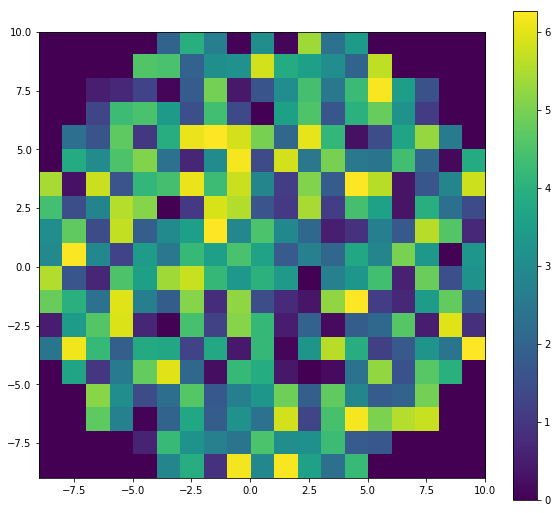

In [748]:
## Get full field data
phi_k = np.random.uniform(-np.pi, np.pi, (Nx, int(Ny/2 + 1)))
a_k   = np.random.uniform(0.0, 10, (Nx, int(Ny/2 + 1)))

phases = np.zeros((2 * kmax - 1, 2 * kmax - 1))
amps   = np.zeros((2 * kmax - 1, 2 * kmax - 1))

for k_x in kx:
    if np.absolute(k_x) < kmax:
        for k_y in ky:
            if np.absolute(k_y) < kmax:
                
                k_sqr = k_x**2 + k_y**2
                
                if k_sqr < kmax_sqr:
                    if k_y == 0:
                        phases[kmax - 1 - k_x, kmax - 1 + k_y] = np.mod(phi_k[k_x, k_y], 2.0 * np.pi)
                        amps[kmax - 1 - k_x, kmax - 1 + k_y]   = a_k[k_x, k_y]
                    else:
                        phases[kmax - 1 - k_x, kmax - 1 + k_y] = np.mod(phi_k[k_x, k_y], 2.0 * np.pi)
                        phases[kmax - 1 + k_x, kmax - 1 - k_y] = np.mod(-phi_k[k_x, k_y], 2.0 * np.pi)
                        amps[kmax - 1 - k_x, kmax - 1 + k_y]   = a_k[k_x, k_y]
                        amps[kmax - 1 + k_x, kmax - 1 - k_y]   = a_k[k_x, k_y]
                        
                        
plt.figure(figsize = (10, 9))
plt.imshow(phases, extent = [-kmax + 1, kmax, -kmax + 1, kmax])
plt.colorbar()
plt.show()

In [749]:
for a in range(n_theta):
    ## Get the k3 sector boundary angles
    k3_theta_lwr = theta[a] - dtheta/2.0
    k3_theta_upr = theta[a] + dtheta/2.0
    
    for l in range(len(k1_sect_angles)):
        ## Get the k1 sector boundary angles
        k1_theta_lwr = theta[a] + k1_sect_angles[l] - dtheta/2.0
        k1_theta_upr = theta[a] + k1_sect_angles[l] + dtheta/2.0
        
        for k3_x in kx:  
            for k3_y in ky:
                ## Get polar coords
                k3_sqr   = k3_x**2 + k3_y**2
                k3_angle = np.arctan2(k3_x, k3_y)

                if (k3_sqr > 0 and k3_sqr < kmax_sqr) and (k3_angle >= k3_theta_lwr and k3_angle < k3_theta_upr):
                    for k1_x in kx:
                        for k1_y in ky:
                            ## Get k1 polar coords
                            k1_sqr   = k1_x**2 + k1_y**2
                            k1_angle = np.arctan2(k1_x, k1_y)

                            if (k1_sqr > 0 and k1_sqr < kmax_sqr) and (k1_angle >= k1_theta_lwr and k2_angle < k1_theta_upr):
                                ## Get k2 
                                k2_x = k3_x - k1_x
                                k2_y = k3_y - k1_y

                                ## Get k2 polar coords
                                k2_sqr   = k2_x**2 + k2_y**2
                                k2_angle = np.arctan2(k2_x, k2_y)
                                if k2_y < 0:
                                    neg_k2_angle = np.arctan2(-k2_x, -k2_y)
                                    
                                ## Get the sector angle for k2
                                k3_vec = np.exp(1j * theta[a])
                                k1_vec = np.exp(1j * (theta[a] + k1_sect_angles[l]))
                                k2_theta = np.real((1.0/ (2.0 * 1j) * (np.log(k3 - k1) - np.log(np.conjugate(k3) - np.conjugate(k1)))))
                                k2_theta_lwr = k2_theta - dtheta/2.0
                                k2_theta_upr = k2_theta + dtheta/2.0

                                if (k2_sqr > 0 and k2_sqr < kmax_sqr) and ((k2_angle >= k2_theta_lwr and k2_angle < k2_theta_lwr) or (k2_y < 0 and neg_k2_angle >= k2_theta_lwr and neg_k2_angle < k2_theta_lwr)):

                                    flux_pre_fac = float(k1_x * k2_y - k_2x * k1_y) * (1.0 / k1_sqr - 1.0 / k2_sqr)

                                    flux_wght = flux_pre_fac * amps[kmax - 1 + k1_x, kmax - 1 + k1_y] * amps[kmax - 1 + k2_x, kmax - 1 + k2_y] * amps[kmax - 1 + k3_x, kmax - 1 + k3_y]

                                    triad_phase = phases[kmax - 1 + k1_x, kmax - 1 + k1_y] + phases[kmax - 1 + k2_x, kmax - 1 + k2_y] - phases[kmax - 1 + k3_x, kmax - 1 + k3_y]
                                    
                                    

In [750]:
for a in range(n_theta):
    for l in range(len(k1_sect_angles)):
        k3 = np.exp(1j * theta[a])
        k1 = np.exp(1j * (theta[a] + k1_sect_angles[l]))
        
        mid_angle = np.real(1.0 / (2.0 * 1j) * (np.log(k3 - k1) - np.log(np.conjugate(k3) - np.conjugate(k1))))
        
        print("a: {} l: {} mid: {}".format(a, l, mid_angle))
    print()

a: 0 l: 0 mid: -0.7199483164476609
a: 0 l: 1 mid: -0.4581489286485115
a: 0 l: 2 mid: -0.3272492347489368
a: 0 l: 3 mid: -0.19634954084936196
a: 0 l: 4 mid: -2.8143434188408567
a: 0 l: 5 mid: -2.6834437249412817
a: 0 l: 6 mid: -2.552544031041707
a: 0 l: 7 mid: -2.2907446432425576

a: 1 l: 0 mid: -0.589048622548086
a: 1 l: 1 mid: -0.32724923474893647
a: 1 l: 2 mid: -0.19634954084936176
a: 1 l: 3 mid: -0.06544984694978709
a: 1 l: 4 mid: -2.6834437249412817
a: 1 l: 5 mid: -2.5525440310417067
a: 1 l: 6 mid: -2.421644337142132
a: 1 l: 7 mid: -2.1598449493429825

a: 2 l: 0 mid: -0.45814892864851126
a: 2 l: 1 mid: -0.19634954084936174
a: 2 l: 2 mid: -0.06544984694978716
a: 2 l: 3 mid: 0.06544984694978773
a: 2 l: 4 mid: -2.552544031041707
a: 2 l: 5 mid: -2.421644337142132
a: 2 l: 6 mid: -2.2907446432425576
a: 2 l: 7 mid: -2.028945255443408

a: 3 l: 0 mid: -0.32724923474893636
a: 3 l: 1 mid: -0.06544984694978698
a: 3 l: 2 mid: 0.06544984694978775
a: 3 l: 3 mid: 0.19634954084936262
a: 3 l: 4 mid: